# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 01:07:30.054621: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T01:07:33.630073
2025-04-15 01:07:33.630073


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 01:07:27"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

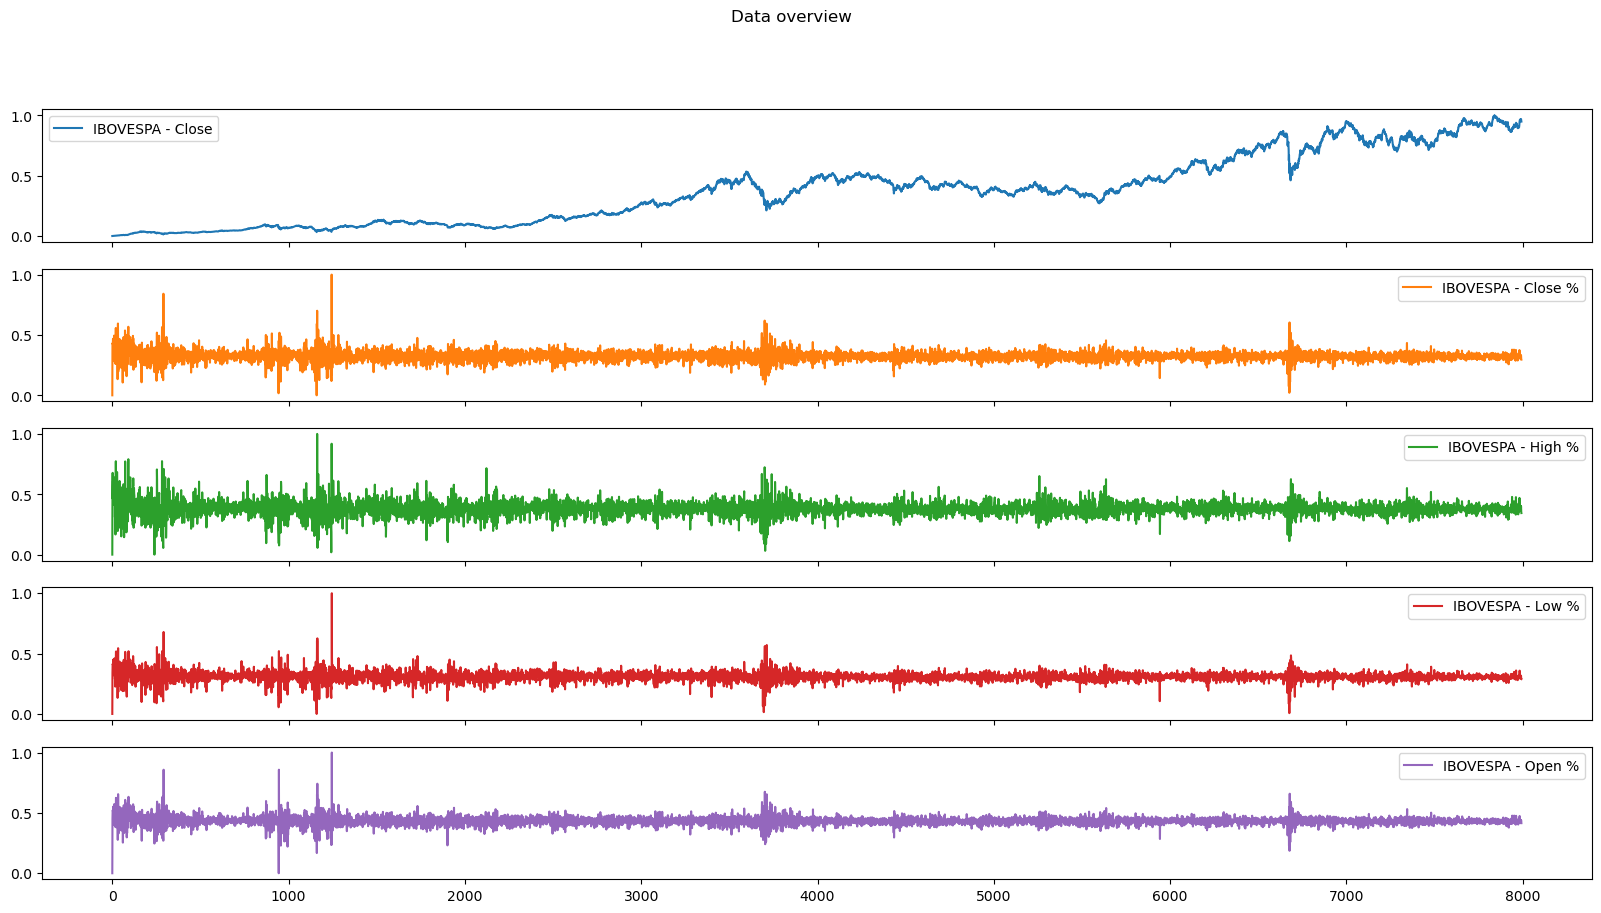

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

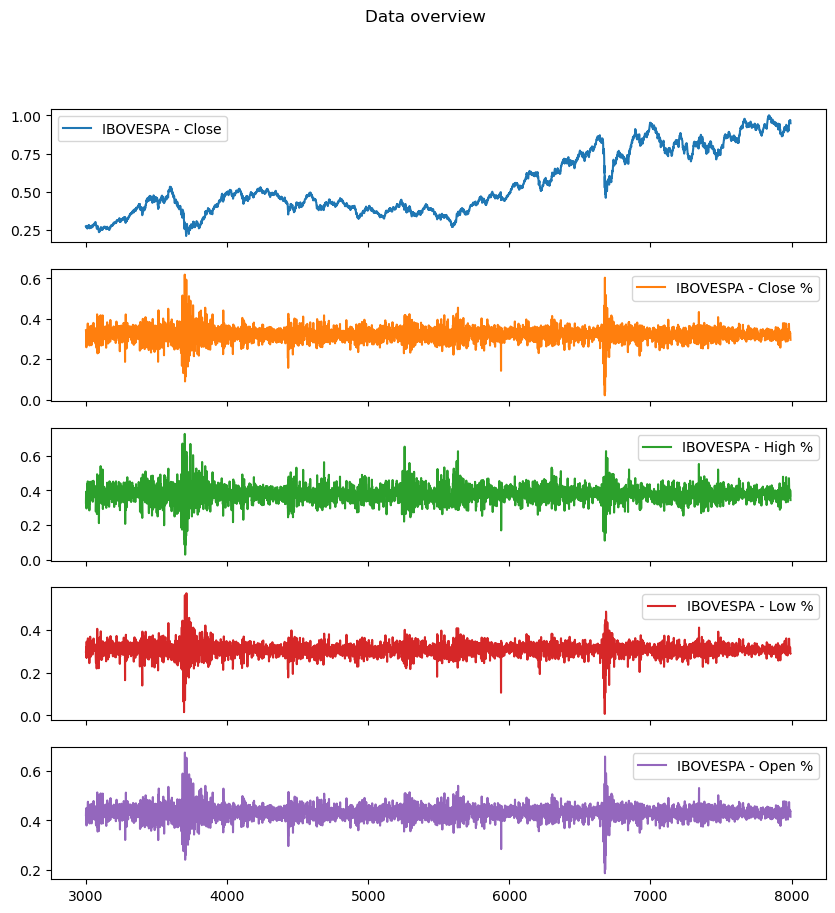

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

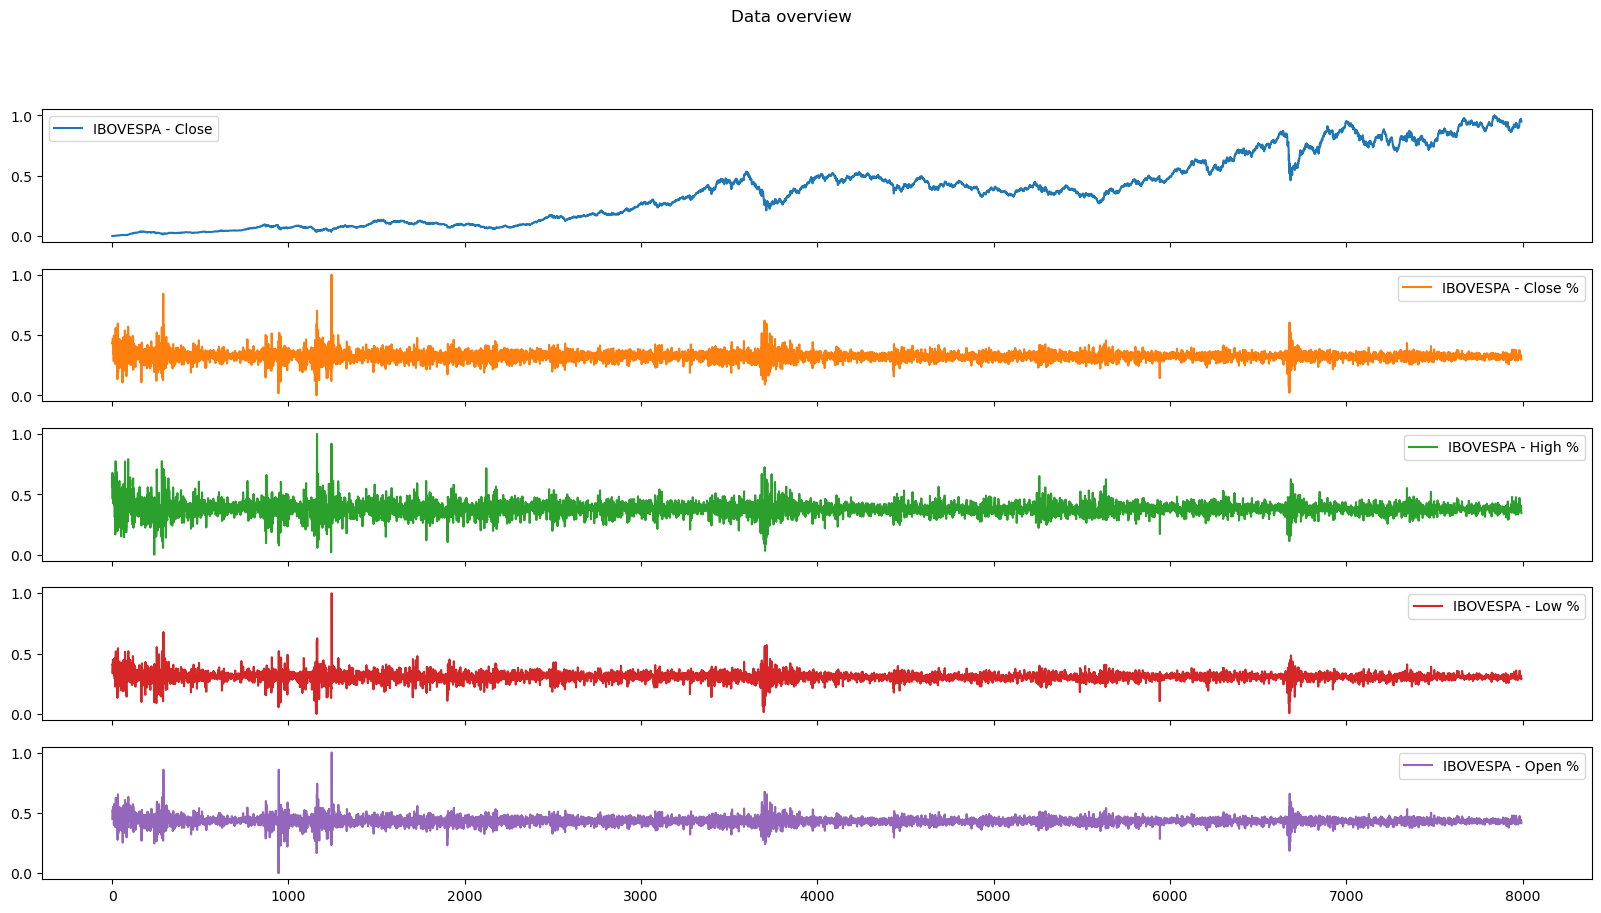

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

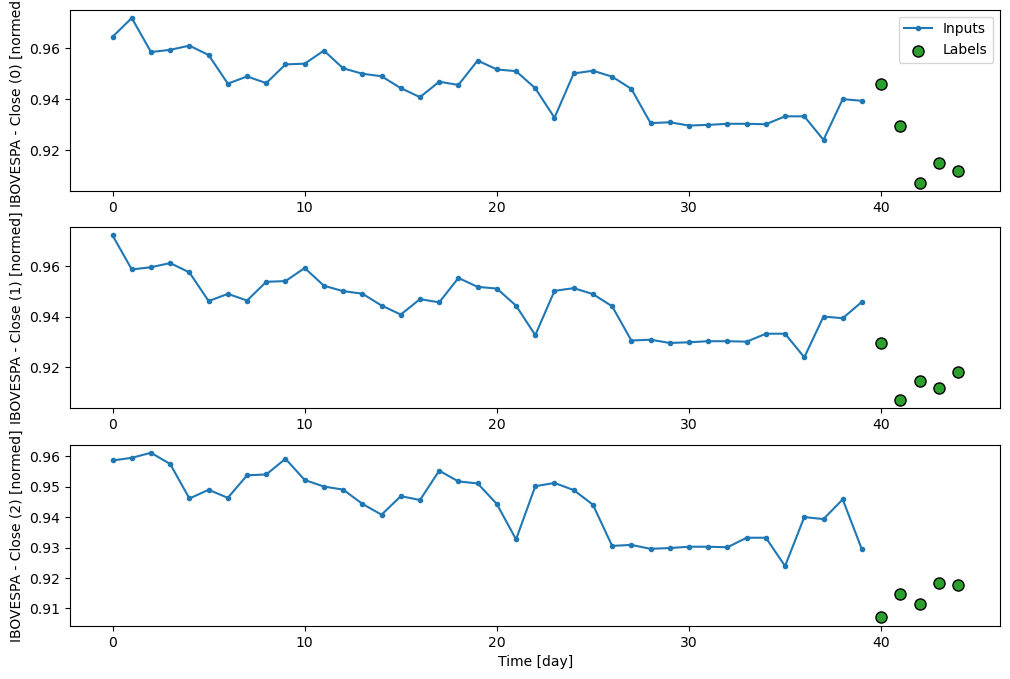

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:08 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 138.2937 - mean_squared_error: 3.4922e-04 - root_mean_squared_error: 0.0177 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 117.5640 - mean_squared_error: 3.2485e-04 - root_mean_squared_error: 0.0174

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 105.8518 - mean_squared_error: 3.0590e-04 - root_mean_squared_error: 0.0170

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 97.3740 - mean_squared_error: 2.8836e-04 - root_mean_squared_error: 0.0166 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 90.0993 - mean_squared_error: 2.7042e-04 - root_mean_squared_error: 0.0161

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 83.7503 - mean_squared_error: 2.5330e-04 - root_mean_squared_error: 0.0156

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 76.7021 - mean_squared_error: 2.3344e-04 - root_mean_squared_error: 0.0149

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 72.2818 - mean_squared_error: 2.2098e-04 - root_mean_squared_error: 0.0145

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.4651 - mean_squared_error: 2.1074e-04 - root_mean_squared_error: 0.0141

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.1652 - mean_squared_error: 2.0278e-04 - root_mean_squared_error: 0.0139

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.3453 - mean_squared_error: 1.9761e-04 - root_mean_squared_error: 0.0137

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.0327 - mean_squared_error: 1.9554e-04 - root_mean_squared_error: 0.0136

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.0120 - mean_squared_error: 1.9450e-04 - root_mean_squared_error: 0.0136

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.2178 - mean_squared_error: 1.9435e-04 - root_mean_squared_error: 0.0136

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.6268 - mean_squared_error: 1.9713e-04 - root_mean_squared_error: 0.0138

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.1601 - mean_squared_error: 2.0046e-04 - root_mean_squared_error: 0.0139

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.7975 - mean_squared_error: 2.0322e-04 - root_mean_squared_error: 0.0140

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.5225 - mean_squared_error: 2.0540e-04 - root_mean_squared_error: 0.0141

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.3227 - mean_squared_error: 2.0695e-04 - root_mean_squared_error: 0.0141

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.2069 - mean_squared_error: 2.0825e-04 - root_mean_squared_error: 0.0142

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.1613 - mean_squared_error: 2.0921e-04 - root_mean_squared_error: 0.0142

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.2120 - mean_squared_error: 2.1045e-04 - root_mean_squared_error: 0.0143

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.3202 - mean_squared_error: 2.1143e-04 - root_mean_squared_error: 0.0143

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.4973 - mean_squared_error: 2.1288e-04 - root_mean_squared_error: 0.0144

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 43.7528 - mean_squared_error: 2.1733e-04 - root_mean_squared_error: 0.0145

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 43.0719 - mean_squared_error: 2.2474e-04 - root_mean_squared_error: 0.0148

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 42.4202 - mean_squared_error: 2.3155e-04 - root_mean_squared_error: 0.0150

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 41.7893 - mean_squared_error: 2.3751e-04 - root_mean_squared_error: 0.0151

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.1791 - mean_squared_error: 2.4275e-04 - root_mean_squared_error: 0.0153

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 40.5966 - mean_squared_error: 2.4834e-04 - root_mean_squared_error: 0.0155

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 40.0506 - mean_squared_error: 2.5698e-04 - root_mean_squared_error: 0.0157

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 39.5255 - mean_squared_error: 2.6588e-04 - root_mean_squared_error: 0.0159

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 39.0160 - mean_squared_error: 2.7404e-04 - root_mean_squared_error: 0.0161

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 38.5207 - mean_squared_error: 2.8151e-04 - root_mean_squared_error: 0.0163

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 38.0408 - mean_squared_error: 2.8889e-04 - root_mean_squared_error: 0.0165

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 37.4224 - mean_squared_error: 2.9839e-04 - root_mean_squared_error: 0.0168

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 36.9775 - mean_squared_error: 3.0655e-04 - root_mean_squared_error: 0.0170

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 36.5689 - mean_squared_error: 3.2415e-04 - root_mean_squared_error: 0.0174

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 36.1826 - mean_squared_error: 3.4424e-04 - root_mean_squared_error: 0.0178

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 35.8173 - mean_squared_error: 3.6994e-04 - root_mean_squared_error: 0.0183

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 35.4800 - mean_squared_error: 4.1429e-04 - root_mean_squared_error: 0.0189

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 35.1654 - mean_squared_error: 4.7170e-04 - root_mean_squared_error: 0.0197

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 34.8656 - mean_squared_error: 5.3143e-04 - root_mean_squared_error: 0.0206

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 34.5738 - mean_squared_error: 5.8915e-04 - root_mean_squared_error: 0.0214

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 34.2975 - mean_squared_error: 6.5067e-04 - root_mean_squared_error: 0.0222

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 34.0373 - mean_squared_error: 7.1594e-04 - root_mean_squared_error: 0.0230

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 33.7821 - mean_squared_error: 7.7783e-04 - root_mean_squared_error: 0.0238

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 33.5304 - mean_squared_error: 8.3590e-04 - root_mean_squared_error: 0.0245

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 33.2827 - mean_squared_error: 8.9057e-04 - root_mean_squared_error: 0.0252

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 33.0390 - mean_squared_error: 9.4211e-04 - root_mean_squared_error: 0.0259

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 32.8015 - mean_squared_error: 9.9133e-04 - root_mean_squared_error: 0.0265

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 32.5677 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0271    

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 32.3388 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 32.1172 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 31.8995 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 31.6856 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 31.4786 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 31.2783 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0303

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 31.0816 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 30.8908 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 30.7057 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 30.5854 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 30.5260 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0321

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 30.4673 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 30.4091 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 30.3514 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0326

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 30.2941 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0327

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 30.2369 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 30.1234 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 30.0105 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 29.8985 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 29.7317 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 29.5662 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 29.4051 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 29.2505 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 29.0988 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 28.9501 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 28.8043 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 28.6603 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 28.4708 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0375

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 28.3303 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 28.2374 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 28.0539 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0386

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 28.0088 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387 - val_loss: 0.0860 - val_mean_absolute_error: 0.0860 - val_mean_absolute_percentage_error: 9.1235 - val_mean_squared_error: 0.0081 - val_root_mean_squared_error: 0.0898 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.7257 - mean_absolute_error: 0.7257 - mean_absolute_percentage_error: 9641.1963 - mean_squared_error: 0.5268 - root_mean_squared_error: 0.7258

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7270 - mean_absolute_error: 0.7270 - mean_absolute_percentage_error: 7392.3076 - mean_squared_error: 0.5287 - root_mean_squared_error: 0.7271 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7188 - mean_absolute_error: 0.7188 - mean_absolute_percentage_error: 6079.0752 - mean_squared_error: 0.5172 - root_mean_squared_error: 0.7191

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7066 - mean_absolute_error: 0.7066 - mean_absolute_percentage_error: 5384.8687 - mean_squared_error: 0.5008 - root_mean_squared_error: 0.7073

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6893 - mean_absolute_error: 0.6893 - mean_absolute_percentage_error: 4903.1660 - mean_squared_error: 0.4795 - root_mean_squared_error: 0.6916

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6677 - mean_absolute_error: 0.6677 - mean_absolute_percentage_error: 4520.7300 - mean_squared_error: 0.4585 - root_mean_squared_error: 0.6755

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6493 - mean_absolute_error: 0.6493 - mean_absolute_percentage_error: 4216.5581 - mean_squared_error: 0.4436 - root_mean_squared_error: 0.6641

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6190 - mean_absolute_error: 0.6190 - mean_absolute_percentage_error: 3866.6887 - mean_squared_error: 0.4198 - root_mean_squared_error: 0.6449

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5957 - mean_absolute_error: 0.5957 - mean_absolute_percentage_error: 3640.6160 - mean_squared_error: 0.4018 - root_mean_squared_error: 0.6298

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5731 - mean_absolute_error: 0.5731 - mean_absolute_percentage_error: 3440.8745 - mean_squared_error: 0.3846 - root_mean_squared_error: 0.6148

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 3264.0083 - mean_squared_error: 0.3686 - root_mean_squared_error: 0.6005

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5323 - mean_absolute_error: 0.5323 - mean_absolute_percentage_error: 3106.1472 - mean_squared_error: 0.3537 - root_mean_squared_error: 0.5869

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5138 - mean_absolute_error: 0.5138 - mean_absolute_percentage_error: 2964.5303 - mean_squared_error: 0.3400 - root_mean_squared_error: 0.5740

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - mean_absolute_percentage_error: 2836.6707 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5618

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4804 - mean_absolute_error: 0.4804 - mean_absolute_percentage_error: 2720.6763 - mean_squared_error: 0.3154 - root_mean_squared_error: 0.5503

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4608 - mean_absolute_error: 0.4608 - mean_absolute_percentage_error: 2581.6968 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5359

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4471 - mean_absolute_error: 0.4471 - mean_absolute_percentage_error: 2487.5212 - mean_squared_error: 0.2912 - root_mean_squared_error: 0.5259

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - mean_absolute_percentage_error: 2373.4534 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5133

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 2295.3750 - mean_squared_error: 0.2707 - root_mean_squared_error: 0.5044

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 2222.8943 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4960

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 2155.4119 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4880

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 2092.4451 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4804

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 2014.7441 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4708

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 1960.6472 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4639

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3562 - mean_absolute_error: 0.3562 - mean_absolute_percentage_error: 1893.4187 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4553

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3487 - mean_absolute_error: 0.3487 - mean_absolute_percentage_error: 1846.3314 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4491

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1801.8253 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4432

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1746.1261 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4357

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1706.8339 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4303

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1669.4861 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4252

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1633.9397 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4202

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1600.0680 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4154

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1567.7419 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4107

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1536.8602 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4063

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1507.3231 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4019

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1479.0370 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3978

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1451.9353 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3937

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1425.9716 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3899

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1392.9562 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3850

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1369.3121 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3814

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1339.1772 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3769

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1317.5476 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3736

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1296.6934 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3704

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1276.5713 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3673

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1257.1508 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3643

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1238.3884 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3614

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1220.2496 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3586

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1202.6979 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3558

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1185.7041 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3531

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1169.2410 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3505

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 1153.2825 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3479

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1137.8055 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3454

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1122.7885 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3429

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1108.2100 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3405

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1089.4197 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3374

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1075.7917 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3351

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1062.5425 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3329

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1049.6578 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3307

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1037.1234 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3286

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 1024.9238 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3265

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1013.0453 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3245

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 1001.4745 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3225

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 990.1964 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3205 

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 979.1991 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3186

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 968.4717 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3168

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 958.0034 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3149

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 947.7857 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3131

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 937.8138 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3114

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 928.0753 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3096

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 918.5608 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3080

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 909.2629 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3063

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 900.1733 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3047

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 891.2847 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3031

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 882.5904 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3015

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 874.0832 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3000

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 865.7572 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2985

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 857.6168 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2970 - val_loss: 0.1192 - val_mean_absolute_error: 0.1192 - val_mean_absolute_percentage_error: 12.6792 - val_mean_squared_error: 0.0149 - val_root_mean_squared_error: 0.1221 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.7361 - mean_absolute_error: 0.7361 - mean_absolute_percentage_error: 9771.9023 - mean_squared_error: 0.5420 - root_mean_squared_error: 0.7362

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7310 - mean_absolute_error: 0.7310 - mean_absolute_percentage_error: 7453.8501 - mean_squared_error: 0.5346 - root_mean_squared_error: 0.7311 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7227 - mean_absolute_error: 0.7227 - mean_absolute_percentage_error: 5865.9082 - mean_squared_error: 0.5227 - root_mean_squared_error: 0.7229

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7150 - mean_absolute_error: 0.7150 - mean_absolute_percentage_error: 5288.3950 - mean_squared_error: 0.5120 - root_mean_squared_error: 0.7154

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7016 - mean_absolute_error: 0.7016 - mean_absolute_percentage_error: 4761.4829 - mean_squared_error: 0.4943 - root_mean_squared_error: 0.7026

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6897 - mean_absolute_error: 0.6897 - mean_absolute_percentage_error: 4457.5347 - mean_squared_error: 0.4794 - root_mean_squared_error: 0.6915

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6764 - mean_absolute_error: 0.6764 - mean_absolute_percentage_error: 4198.4473 - mean_squared_error: 0.4636 - root_mean_squared_error: 0.6795

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6619 - mean_absolute_error: 0.6619 - mean_absolute_percentage_error: 3971.6775 - mean_squared_error: 0.4475 - root_mean_squared_error: 0.6669

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6464 - mean_absolute_error: 0.6464 - mean_absolute_percentage_error: 3768.7227 - mean_squared_error: 0.4313 - root_mean_squared_error: 0.6538

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6296 - mean_absolute_error: 0.6296 - mean_absolute_percentage_error: 3585.5144 - mean_squared_error: 0.4154 - root_mean_squared_error: 0.6406

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6125 - mean_absolute_error: 0.6125 - mean_absolute_percentage_error: 3419.9729 - mean_squared_error: 0.4001 - root_mean_squared_error: 0.6275

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5955 - mean_absolute_error: 0.5955 - mean_absolute_percentage_error: 3270.0996 - mean_squared_error: 0.3856 - root_mean_squared_error: 0.6149

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5789 - mean_absolute_error: 0.5789 - mean_absolute_percentage_error: 3133.7341 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.6027

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5574 - mean_absolute_error: 0.5574 - mean_absolute_percentage_error: 2969.9492 - mean_squared_error: 0.3552 - root_mean_squared_error: 0.5873

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5420 - mean_absolute_error: 0.5420 - mean_absolute_percentage_error: 2858.8694 - mean_squared_error: 0.3435 - root_mean_squared_error: 0.5764

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5274 - mean_absolute_error: 0.5274 - mean_absolute_percentage_error: 2756.6028 - mean_squared_error: 0.3326 - root_mean_squared_error: 0.5660

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5135 - mean_absolute_error: 0.5135 - mean_absolute_percentage_error: 2662.1375 - mean_squared_error: 0.3224 - root_mean_squared_error: 0.5561

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - mean_absolute_percentage_error: 2574.6294 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5467

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2467.4692 - mean_squared_error: 0.3009 - root_mean_squared_error: 0.5348

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4718 - mean_absolute_error: 0.4718 - mean_absolute_percentage_error: 2393.4370 - mean_squared_error: 0.2927 - root_mean_squared_error: 0.5264

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - mean_absolute_percentage_error: 2324.2358 - mean_squared_error: 0.2849 - root_mean_squared_error: 0.5183

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4501 - mean_absolute_error: 0.4501 - mean_absolute_percentage_error: 2259.4321 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.5106

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.4400 - mean_absolute_error: 0.4400 - mean_absolute_percentage_error: 2198.5837 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.5033

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - mean_absolute_percentage_error: 2141.3440 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.4962

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.4213 - mean_absolute_error: 0.4213 - mean_absolute_percentage_error: 2087.3992 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4895

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 2036.4492 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4830

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1988.2305 - mean_squared_error: 0.2463 - root_mean_squared_error: 0.4768

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 1942.5171 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4709

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 1899.1106 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4651

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 1857.8403 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4596

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 1818.5566 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4543

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3683 - mean_absolute_error: 0.3683 - mean_absolute_percentage_error: 1781.1066 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4491

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 1745.3549 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4442

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1711.1849 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4394

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 1678.4917 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4347

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1647.1776 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4303

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1617.1523 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4259

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1588.3579 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4217

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 1560.7366 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4177

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1534.1942 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4138

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1508.6514 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4101

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1484.0494 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4064

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1452.6180 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4017

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1430.0100 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3983

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1408.1816 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3949

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1387.0970 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3917

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1366.7119 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3885

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1340.5590 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3844

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 1321.6700 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3815

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1303.3700 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3786

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1285.6304 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3757

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1268.4249 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3729

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1251.7302 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3702

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1235.5227 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3676

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1219.7793 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3650

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1204.4805 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3625

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1189.6097 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3600

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1175.1464 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1161.0741 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3552

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1147.3782 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3529

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1134.0430 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3506

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1121.0543 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3484

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1108.3988 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3462

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1096.0608 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3441

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1084.0277 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3420

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1072.2872 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3400

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1060.8279 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3380

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1049.6399 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3360

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1038.7167 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3341

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1028.0455 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3322

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1017.6183 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3304

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1007.4270 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3286

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 997.4617 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3268 

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 987.7143 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3251

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 978.1780 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3234

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 968.8452 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3217

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 959.7094 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3200

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 950.7761 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3184 - val_loss: 0.1225 - val_mean_absolute_error: 0.1225 - val_mean_absolute_percentage_error: 13.0420 - val_mean_squared_error: 0.0156 - val_root_mean_squared_error: 0.1248 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.5855 - mean_absolute_error: 0.5855 - mean_absolute_percentage_error: 7776.7124 - mean_squared_error: 0.3429 - root_mean_squared_error: 0.5856

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5821 - mean_absolute_error: 0.5821 - mean_absolute_percentage_error: 5935.4150 - mean_squared_error: 0.3389 - root_mean_squared_error: 0.5821 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5764 - mean_absolute_error: 0.5764 - mean_absolute_percentage_error: 4881.2983 - mean_squared_error: 0.3324 - root_mean_squared_error: 0.5765

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5710 - mean_absolute_error: 0.5710 - mean_absolute_percentage_error: 4342.5596 - mean_squared_error: 0.3263 - root_mean_squared_error: 0.5712

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5647 - mean_absolute_error: 0.5647 - mean_absolute_percentage_error: 3984.3904 - mean_squared_error: 0.3195 - root_mean_squared_error: 0.5650

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5573 - mean_absolute_error: 0.5573 - mean_absolute_percentage_error: 3712.2859 - mean_squared_error: 0.3117 - root_mean_squared_error: 0.5580

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5517 - mean_absolute_error: 0.5517 - mean_absolute_percentage_error: 3558.8665 - mean_squared_error: 0.3061 - root_mean_squared_error: 0.5527

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5425 - mean_absolute_error: 0.5425 - mean_absolute_percentage_error: 3356.4099 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5443

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5321 - mean_absolute_error: 0.5321 - mean_absolute_percentage_error: 3178.7649 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5351

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5203 - mean_absolute_error: 0.5203 - mean_absolute_percentage_error: 3018.8550 - mean_squared_error: 0.2780 - root_mean_squared_error: 0.5253

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5070 - mean_absolute_error: 0.5070 - mean_absolute_percentage_error: 2873.6406 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.5152

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4931 - mean_absolute_error: 0.4931 - mean_absolute_percentage_error: 2741.8008 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.5050

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - mean_absolute_percentage_error: 2622.0276 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4951

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4655 - mean_absolute_error: 0.4655 - mean_absolute_percentage_error: 2513.0347 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4855

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4524 - mean_absolute_error: 0.4524 - mean_absolute_percentage_error: 2413.5840 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4763

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 2322.3987 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4675

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2238.4692 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4591

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 2161.0198 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4511

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2089.3213 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4435

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2022.7479 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4362

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 1960.7668 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4293

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 1902.9055 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4227

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 1848.7616 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.4164

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1797.9929 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.4103

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1750.2870 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.4045

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1705.3573 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3990

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1649.3444 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3919

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1610.0033 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3869

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1572.7305 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3820

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1537.3549 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3774

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1503.7325 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3729

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1471.7374 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3686

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1441.2463 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3644

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1412.1459 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3604

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1384.3401 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3565

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1349.1348 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3515

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1324.0300 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3479

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1292.1527 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3433

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1269.3867 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3400

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1247.5365 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3368

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1226.5273 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3337

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1206.3008 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3307

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1186.8123 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3278

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1168.0201 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3250

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1149.8857 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3222

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1132.3762 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3196

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1115.4622 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3169

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1099.1078 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3144

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1083.2849 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3119

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1067.9658 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.3095

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1053.1261 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.3072

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1038.7435 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3049

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1024.7958 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.3026

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1011.2631 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.3004

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 998.1274 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2983 

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 985.3694 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2962

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 972.9726 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2941

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 960.9234 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2921

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 949.2067 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2902

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 937.8073 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2882

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 926.7137 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2864

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 915.9133 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2845

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 901.9478 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2821

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 891.7853 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2804

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 881.8767 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2787

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 872.2117 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2770

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 862.7809 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2754

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 853.5754 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2737

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 844.5878 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2722

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 835.8130 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2706

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 827.2411 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2691

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 818.8647 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2676

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 810.6773 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2662

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 802.6716 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2647

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 794.8411 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2633

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 787.1800 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2619

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 779.6826 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2606

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 772.3431 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2593

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 765.1659 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2579 - val_loss: 0.0283 - val_mean_absolute_error: 0.0283 - val_mean_absolute_percentage_error: 2.9826 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0330 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.4585 - mean_absolute_error: 0.4585 - mean_absolute_percentage_error: 6091.8164 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4586

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4546 - mean_absolute_error: 0.4546 - mean_absolute_percentage_error: 4312.5127 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4547 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4491 - mean_absolute_error: 0.4491 - mean_absolute_percentage_error: 3655.2163 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4493

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4430 - mean_absolute_error: 0.4430 - mean_absolute_percentage_error: 3289.0684 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4434

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4355 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 3026.6738 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4362

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 2818.2039 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.4280

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 2640.9814 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.4188

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 2484.7830 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.4089

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3902 - mean_absolute_error: 0.3902 - mean_absolute_percentage_error: 2345.7769 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3990

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_absolute_percentage_error: 2222.8826 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3895

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 2113.4414 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3804

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 2015.0526 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3718

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1926.6965 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3637

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 1846.7413 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3560

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1773.7963 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3488

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1707.0726 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3419

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1645.7773 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3355

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1589.2305 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3294

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1536.9288 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3236

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1488.3961 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3181

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1443.2206 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3129

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1401.0780 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.3079

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1361.6395 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.3032

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1324.6366 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2987

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1289.8417 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2943

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1257.0588 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2902

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1226.1102 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2863

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1196.8490 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2825

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1169.1234 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2789

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1134.3350 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2742

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1109.7383 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2709

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1086.3163 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2677

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1063.9891 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2647

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1042.6736 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2617

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1022.3019 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2588

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 1002.8111 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2561

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 984.1404 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2534 

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 966.2390 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2508

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 949.0705 - mean_squared_error: 0.0701 - root_mean_squared_error: 0.2483

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 932.5834 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2459

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 916.7316 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2436

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 901.4813 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2413

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 886.7952 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2391

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 872.6376 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2370

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 858.9808 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2349

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 845.7985 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2329

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 833.0645 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2310

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 816.7441 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2284

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 804.9685 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2266

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 793.5683 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2248

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 782.5275 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2231

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 771.8288 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2214

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 761.4546 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2197

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 751.3901 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2181

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 741.6213 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2165

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 732.1334 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2149

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 722.9147 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2134

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 713.9558 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2119

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 705.2433 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2105

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 696.7673 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2091

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 688.5184 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2077

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 680.4861 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2064

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 672.6611 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2050

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 665.0350 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2037

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 657.6008 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2025

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 650.3508 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2012

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 643.2784 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2000

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 636.3762 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1988

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 629.6381 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.1976

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 623.0597 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1965

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 616.6335 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.1953

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 610.3555 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.1943

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 604.2202 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1932

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 598.2217 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1921

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 592.3555 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1911

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 586.6169 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1901

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 581.0015 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1891

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 575.5051 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1881

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 570.1303 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1872 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3485 - val_mean_squared_error: 2.5678e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 4130.7261 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.3114

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 3148.2983 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.3084 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 2575.7188 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.3016

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 2270.2466 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2946

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 2059.2092 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2867

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1892.5039 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2779

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1751.2166 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2689

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1631.1239 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2602

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1528.9437 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2522

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1440.3461 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2449

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1362.4496 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2382

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1293.5356 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2319

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1232.3574 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2261

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 1177.5093 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2208

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 1127.9608 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2158

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1082.9517 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2111

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 1041.8256 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.2067

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 1004.1234 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.2026

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 969.4163 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1988 

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 937.3250 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1951

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 907.5676 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1917

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 879.8782 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1884

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 854.0723 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1853

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 829.9441 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1824

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 800.1055 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1787

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 779.2833 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1761

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 759.6605 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1736

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 741.1425 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1712

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 723.6205 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1689

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 701.6688 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1660

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 686.1694 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1639

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 671.4249 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1619

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 657.3828 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1600

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 643.9879 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1582

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 631.1961 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1564

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 618.9647 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1547

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 607.2568 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1530

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 592.4031 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1509

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 581.7926 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1494

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 571.6050 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1479

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 561.8179 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1465

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 552.4056 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1451

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 543.3423 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1438

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 534.6084 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1425

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 526.1857 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1412

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 518.0563 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1400

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 510.2057 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1388

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 502.6199 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1377

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 495.2836 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1366

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 488.1839 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1355

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 481.3109 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1344

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 474.6523 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1334

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 468.1974 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1324

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 461.9381 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1314

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 455.8651 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1304

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 449.9684 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1295

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 444.2411 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1286

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 438.6770 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1277

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 433.2677 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1268

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 428.0074 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1260

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 422.8897 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1251

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 417.9075 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1243

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 413.0549 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1235

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 408.3268 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1227

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 403.7186 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1220

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 399.2256 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1212

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 394.8437 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1205

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 390.5681 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1198

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 386.3950 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1191

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 382.3216 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1184

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 378.3434 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1177

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 374.4576 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1170

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 370.6604 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1164

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 366.9494 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1158

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 363.3210 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1152

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 358.6068 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1144

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 355.1605 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1138

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 350.6803 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1130

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 349.5823 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1128 - val_loss: 0.0202 - val_mean_absolute_error: 0.0202 - val_mean_absolute_percentage_error: 2.1959 - val_mean_squared_error: 5.5716e-04 - val_root_mean_squared_error: 0.0236 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 3369.1245 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2540

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 2569.8262 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2516 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 2099.0391 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2451

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1843.8572 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2382

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1665.2582 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2305

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1480.0188 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2194

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1367.6870 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2115

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1274.2427 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.2043

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 1194.5667 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1979

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 1125.2191 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1919

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 1064.5123 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1865

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 1010.9637 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1815

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 963.3667 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1769 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1550 - mean_absolute_error: 0.1550 - mean_absolute_percentage_error: 920.6722 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1727

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 882.1625 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1687

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 847.1484 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1651

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 815.1672 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1616

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 785.8459 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1584

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 758.8229 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1554

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 733.8336 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1525

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 703.2775 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1490

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 682.1904 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1465

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 662.5017 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1441

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 644.0739 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1418

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 626.7717 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1397

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 610.4873 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1376

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 595.1354 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1356

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 580.6325 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1338

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 566.9078 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1320

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 553.8973 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1303

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 541.5433 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1286

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 529.7958 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1270

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 518.6102 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1255

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 507.9442 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1240

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 497.7613 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1226

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 488.0282 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1212

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 478.7150 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1199

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 469.7936 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1186

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 461.2409 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1174

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 453.0326 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1162

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 447.7411 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1154

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 440.0596 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1143

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 432.6692 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1132

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 425.5528 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1122

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 418.6946 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1111

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 412.0801 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1101

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 405.6968 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1092

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 399.5320 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1082

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 393.5740 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1073

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 387.8119 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1064

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 382.2358 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1056

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 376.8368 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1047

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 373.3315 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1042

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 369.8985 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1036

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 364.8796 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1028

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 360.0111 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1020

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 355.2865 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1013

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 350.6986 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1005

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 346.2416 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0998

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 341.9101 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0991

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 337.6987 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0984

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 333.6020 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0977

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 328.3100 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0968

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 324.4627 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0962

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 320.7151 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0956

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 317.0634 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0949

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 313.5036 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0943

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 310.0321 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0938

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 306.6454 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0932

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 303.3406 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0926

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 300.1150 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0921

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 296.9652 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0915

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 293.8888 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0910

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 290.8828 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0905

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 287.9451 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0900

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 284.1300 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0893

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 281.3419 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0888

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 278.6145 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0883

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 275.9455 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0879

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 274.2007 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0876 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225 - val_mean_absolute_percentage_error: 2.3768 - val_mean_squared_error: 6.6357e-04 - val_root_mean_squared_error: 0.0258 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1847.9547 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1401

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 1400.7103 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1368  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1201.9951 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1319

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1067.4801 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1268

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 967.1252 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1218 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 885.3247 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1169

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 791.5421 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1107

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 742.7138 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1073

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 682.2433 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1028

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 647.7853 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1001

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 603.1072 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0964

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 565.0078 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0932

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 532.0515 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0902

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 503.2560 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0875

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 477.9090 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0851

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 455.4107 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0829

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 435.1984 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0808

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 416.9197 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0789

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 400.3092 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0772

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 385.1401 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0755

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 371.2292 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0740

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 358.4191 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0726

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 346.5911 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0712

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 335.6208 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 325.4215 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0687

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 315.9096 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0676

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 307.0128 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0665

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 298.6665 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 290.8197 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0645

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 285.8446 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 281.0587 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 276.4515 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 269.8533 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 263.6027 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 259.6147 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 253.8825 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 248.4304 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0589

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 243.2363 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 238.2817 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 236.6804 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 235.1034 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 232.0197 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 227.5619 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 223.2940 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 219.2050 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 215.2821 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 211.5145 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 207.8927 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 204.4081 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 201.0524 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 198.8833 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 195.7267 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 193.6845 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 190.7098 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 188.7833 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 185.9743 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 183.2575 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 180.6286 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 178.9226 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 177.2524 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 175.6169 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 174.0149 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 172.4455 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 171.6728 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 170.9079 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 170.1506 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 168.6584 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 166.4744 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 163.6597 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 162.2923 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 160.9505 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 159.6334 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 158.3404 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 157.0708 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 155.8238 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 154.5989 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 153.3955 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0452

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 152.2130 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0450

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 151.0510 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0448

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 149.9087 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 148.2313 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 147.1362 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0442

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 146.0591 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 144.4764 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 142.9322 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 141.4247 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0433

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 140.4396 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0431

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 139.4697 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 138.5148 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0428

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 137.5746 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 136.1910 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 134.8384 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0423

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 133.5157 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0421

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 132.6501 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0419

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 131.3752 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 130.5418 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219 - val_mean_absolute_percentage_error: 2.3128 - val_mean_squared_error: 6.3919e-04 - val_root_mean_squared_error: 0.0253 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1444.1018 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1099

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1091.2241 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1067 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 824.6358 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0976 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 707.6194 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0910

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 626.5130 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 566.8467 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0815

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 519.1263 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0778

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 480.1383 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0747

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 457.7390 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0728

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 428.2840 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0702

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 402.8966 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0679

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 380.7120 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0658

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 361.2086 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0639

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 343.9234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0622

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 328.4595 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 314.5125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 301.8489 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0578

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 290.2938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0566

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 283.1341 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 273.1164 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 266.8733 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 260.9484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 255.3157 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 247.3725 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 239.9815 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 233.0840 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 226.6270 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 220.5645 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 214.8605 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 209.4812 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 204.3989 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 199.5892 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 195.0291 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 190.6992 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 186.5818 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 182.6605 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 178.9211 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 175.3510 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 171.9389 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 168.6740 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 165.5484 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 162.5518 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 159.6754 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 156.9117 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 154.2539 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 151.6957 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 149.2312 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 146.8553 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 144.5635 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 142.3510 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 140.2136 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 138.1473 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 136.1484 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 134.2136 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 132.9578 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 131.7281 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 129.9309 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 128.7633 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 127.0557 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 125.3983 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 123.7891 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 122.2259 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 120.7068 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 119.2297 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 117.7927 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 116.3942 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 115.0325 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 113.7062 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 112.4141 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 111.1546 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 109.9265 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 108.3358 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 107.1769 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 106.0457 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 104.5788 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 103.5085 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 102.4627 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 101.7787 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 100.7718 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 99.7873 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316 

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 98.8243 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 97.8831 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.6915 - val_mean_squared_error: 3.7599e-04 - val_root_mean_squared_error: 0.0194 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 1125.3110 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0862

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 847.8383 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0832  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 674.4839 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0769

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 568.2687 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 498.6814 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 448.6519 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0632

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 409.0525 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 377.0082 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 350.2722 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 327.6029 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0534

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 308.1224 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0516

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 291.1651 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 276.2533 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 263.0174 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 251.1607 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 240.4741 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 230.7840 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 221.9459 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 213.8528 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 206.4084 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 199.5392 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 193.1773 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 187.2708 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 181.7727 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 176.6366 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 171.8226 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 167.2994 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 163.0398 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 159.0195 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 155.2190 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 152.7981 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 149.3236 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 146.0243 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 142.8866 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 139.8980 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 137.0479 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 134.3268 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 131.7263 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.2378 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 126.8563 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 124.5733 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 122.3822 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 120.2771 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 118.2526 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 116.3040 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 114.4269 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 112.6173 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 110.8718 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 109.1868 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 107.5590 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.9852 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 104.4626 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 102.9888 - mean_squared_error: 9.9801e-04 - root_mean_squared_error: 0.0283

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 101.5612 - mean_squared_error: 9.8532e-04 - root_mean_squared_error: 0.0281

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 100.1777 - mean_squared_error: 9.7302e-04 - root_mean_squared_error: 0.0279

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.8364 - mean_squared_error: 9.6112e-04 - root_mean_squared_error: 0.0277 

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 97.5354 - mean_squared_error: 9.4958e-04 - root_mean_squared_error: 0.0275

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 96.2726 - mean_squared_error: 9.3837e-04 - root_mean_squared_error: 0.0274

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.0463 - mean_squared_error: 9.2749e-04 - root_mean_squared_error: 0.0272

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.8551 - mean_squared_error: 9.1693e-04 - root_mean_squared_error: 0.0270

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.6974 - mean_squared_error: 9.0668e-04 - root_mean_squared_error: 0.0269

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 91.5715 - mean_squared_error: 8.9671e-04 - root_mean_squared_error: 0.0267

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.4762 - mean_squared_error: 8.8702e-04 - root_mean_squared_error: 0.0266

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.4101 - mean_squared_error: 8.7760e-04 - root_mean_squared_error: 0.0264

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.3719 - mean_squared_error: 8.6843e-04 - root_mean_squared_error: 0.0263

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.3607 - mean_squared_error: 8.5953e-04 - root_mean_squared_error: 0.0261

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 86.3754 - mean_squared_error: 8.5088e-04 - root_mean_squared_error: 0.0260

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.4149 - mean_squared_error: 8.4248e-04 - root_mean_squared_error: 0.0259

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.4782 - mean_squared_error: 8.3432e-04 - root_mean_squared_error: 0.0257

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 83.8665 - mean_squared_error: 8.2899e-04 - root_mean_squared_error: 0.0256

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 82.9678 - mean_squared_error: 8.2143e-04 - root_mean_squared_error: 0.0255

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.0910 - mean_squared_error: 8.1420e-04 - root_mean_squared_error: 0.0254

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.2350 - mean_squared_error: 8.0724e-04 - root_mean_squared_error: 0.0253

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 80.3991 - mean_squared_error: 8.0050e-04 - root_mean_squared_error: 0.0252

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 79.5824 - mean_squared_error: 7.9399e-04 - root_mean_squared_error: 0.0251

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 78.7845 - mean_squared_error: 7.8770e-04 - root_mean_squared_error: 0.0250

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.0045 - mean_squared_error: 7.8162e-04 - root_mean_squared_error: 0.0249

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 77.2418 - mean_squared_error: 7.7571e-04 - root_mean_squared_error: 0.0248

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 76.4960 - mean_squared_error: 7.6999e-04 - root_mean_squared_error: 0.0247

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 75.7663 - mean_squared_error: 7.6447e-04 - root_mean_squared_error: 0.0247

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 75.2894 - mean_squared_error: 7.6087e-04 - root_mean_squared_error: 0.0246 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1372 - val_mean_squared_error: 1.8430e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 1005.1558 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0771

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 755.4945 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0741  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 598.7240 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 503.7701 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 442.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 398.0822 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 362.9731 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 334.6074 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0509

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 310.9719 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 290.9414 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 273.7309 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 258.7447 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 245.5681 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 233.8665 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 223.3735 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 213.9071 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 205.3203 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 197.4862 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 190.3085 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 183.7041 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 177.6084 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 171.9648 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 166.7273 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 161.8540 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 157.3033 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 153.0376 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 149.0287 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 145.2522 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 141.6870 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 138.3159 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.1229 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 132.0933 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 129.2148 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 126.4756 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 123.8651 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.3742 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 118.9952 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.7202 - mean_squared_error: 9.8249e-04 - root_mean_squared_error: 0.0284

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 114.5431 - mean_squared_error: 9.6497e-04 - root_mean_squared_error: 0.0281

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.4587 - mean_squared_error: 9.4841e-04 - root_mean_squared_error: 0.0278

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 110.4593 - mean_squared_error: 9.3258e-04 - root_mean_squared_error: 0.0276

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.5396 - mean_squared_error: 9.1746e-04 - root_mean_squared_error: 0.0273

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 106.6944 - mean_squared_error: 9.0299e-04 - root_mean_squared_error: 0.0271

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 104.9194 - mean_squared_error: 8.8914e-04 - root_mean_squared_error: 0.0269

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 103.2102 - mean_squared_error: 8.7583e-04 - root_mean_squared_error: 0.0267

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.5632 - mean_squared_error: 8.6304e-04 - root_mean_squared_error: 0.0265

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.9749 - mean_squared_error: 8.5074e-04 - root_mean_squared_error: 0.0263 

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.4425 - mean_squared_error: 8.3894e-04 - root_mean_squared_error: 0.0261

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.9628 - mean_squared_error: 8.2758e-04 - root_mean_squared_error: 0.0259

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.0041 - mean_squared_error: 8.2023e-04 - root_mean_squared_error: 0.0258

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.0667 - mean_squared_error: 8.1304e-04 - root_mean_squared_error: 0.0256

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.1497 - mean_squared_error: 8.0600e-04 - root_mean_squared_error: 0.0255

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.8115 - mean_squared_error: 7.9572e-04 - root_mean_squared_error: 0.0254

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.5156 - mean_squared_error: 7.8576e-04 - root_mean_squared_error: 0.0252

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.2602 - mean_squared_error: 7.7610e-04 - root_mean_squared_error: 0.0250

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.0433 - mean_squared_error: 7.6674e-04 - root_mean_squared_error: 0.0249

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.8633 - mean_squared_error: 7.5769e-04 - root_mean_squared_error: 0.0247

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.7184 - mean_squared_error: 7.4891e-04 - root_mean_squared_error: 0.0246

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.6068 - mean_squared_error: 7.4037e-04 - root_mean_squared_error: 0.0244

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.5273 - mean_squared_error: 7.3209e-04 - root_mean_squared_error: 0.0243

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.4784 - mean_squared_error: 7.2406e-04 - root_mean_squared_error: 0.0241

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.4588 - mean_squared_error: 7.1626e-04 - root_mean_squared_error: 0.0240

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.4671 - mean_squared_error: 7.0869e-04 - root_mean_squared_error: 0.0239

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8209 - mean_squared_error: 7.0376e-04 - root_mean_squared_error: 0.0238

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.8730 - mean_squared_error: 6.9653e-04 - root_mean_squared_error: 0.0236

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.9500 - mean_squared_error: 6.8950e-04 - root_mean_squared_error: 0.0235

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.0509 - mean_squared_error: 6.8269e-04 - root_mean_squared_error: 0.0234

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.1748 - mean_squared_error: 6.7608e-04 - root_mean_squared_error: 0.0233

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.3207 - mean_squared_error: 6.6967e-04 - root_mean_squared_error: 0.0232

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.4878 - mean_squared_error: 6.6344e-04 - root_mean_squared_error: 0.0231

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.6751 - mean_squared_error: 6.5739e-04 - root_mean_squared_error: 0.0230

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.8827 - mean_squared_error: 6.5184e-04 - root_mean_squared_error: 0.0229

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.1091 - mean_squared_error: 6.4646e-04 - root_mean_squared_error: 0.0228

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.3539 - mean_squared_error: 6.4131e-04 - root_mean_squared_error: 0.0227

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.6161 - mean_squared_error: 6.3631e-04 - root_mean_squared_error: 0.0226

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.8953 - mean_squared_error: 6.3149e-04 - root_mean_squared_error: 0.0225

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.1909 - mean_squared_error: 6.2685e-04 - root_mean_squared_error: 0.0224

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.5022 - mean_squared_error: 6.2234e-04 - root_mean_squared_error: 0.0224

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.8288 - mean_squared_error: 6.1799e-04 - root_mean_squared_error: 0.0223

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.1700 - mean_squared_error: 6.1377e-04 - root_mean_squared_error: 0.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.3145 - mean_squared_error: 6.0837e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0755 - val_mean_squared_error: 1.6659e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 1051.9045 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0807

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 789.1194 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0773  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 626.0228 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0711

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 526.5902 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 462.1889 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 415.5918 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0583

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 378.9031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0555

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 349.4827 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 324.9248 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0511

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 304.0867 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 286.1429 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 270.5017 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 256.7234 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 244.4868 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 233.5213 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 223.6334 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 214.6641 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 206.4799 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 198.9841 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 192.0877 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 185.7235 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 179.8266 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 174.3502 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 169.2504 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 164.4847 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 160.0169 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 155.8185 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 150.5971 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 146.9349 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 143.4706 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 140.1873 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 137.0703 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 133.1520 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 130.3758 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 127.7278 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 125.1996 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 122.7830 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 120.4704 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 118.2570 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 116.1349 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 114.0978 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.1404 - mean_squared_error: 9.9081e-04 - root_mean_squared_error: 0.0284

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.2578 - mean_squared_error: 9.7522e-04 - root_mean_squared_error: 0.0282

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 107.8563 - mean_squared_error: 9.5537e-04 - root_mean_squared_error: 0.0278

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 106.1314 - mean_squared_error: 9.4114e-04 - root_mean_squared_error: 0.0276

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 104.4681 - mean_squared_error: 9.2745e-04 - root_mean_squared_error: 0.0274

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 102.8633 - mean_squared_error: 9.1429e-04 - root_mean_squared_error: 0.0272

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 101.3135 - mean_squared_error: 9.0161e-04 - root_mean_squared_error: 0.0270

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 99.8158 - mean_squared_error: 8.8938e-04 - root_mean_squared_error: 0.0268 

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 98.3675 - mean_squared_error: 8.7754e-04 - root_mean_squared_error: 0.0266

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 96.9659 - mean_squared_error: 8.6608e-04 - root_mean_squared_error: 0.0264

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.6089 - mean_squared_error: 8.5498e-04 - root_mean_squared_error: 0.0262

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 94.2942 - mean_squared_error: 8.4422e-04 - root_mean_squared_error: 0.0260

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 93.0198 - mean_squared_error: 8.3379e-04 - root_mean_squared_error: 0.0259

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 91.3807 - mean_squared_error: 8.2043e-04 - root_mean_squared_error: 0.0257

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 90.1937 - mean_squared_error: 8.1075e-04 - root_mean_squared_error: 0.0255

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 89.0412 - mean_squared_error: 8.0135e-04 - root_mean_squared_error: 0.0253

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 87.9218 - mean_squared_error: 7.9223e-04 - root_mean_squared_error: 0.0252

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.8341 - mean_squared_error: 7.8339e-04 - root_mean_squared_error: 0.0250

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.7766 - mean_squared_error: 7.7481e-04 - root_mean_squared_error: 0.0249

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.7478 - mean_squared_error: 7.6648e-04 - root_mean_squared_error: 0.0247

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.4189 - mean_squared_error: 7.5573e-04 - root_mean_squared_error: 0.0246

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.4527 - mean_squared_error: 7.4792e-04 - root_mean_squared_error: 0.0244

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 81.5116 - mean_squared_error: 7.4036e-04 - root_mean_squared_error: 0.0243

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.5946 - mean_squared_error: 7.3303e-04 - root_mean_squared_error: 0.0242

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.7007 - mean_squared_error: 7.2592e-04 - root_mean_squared_error: 0.0241

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.5432 - mean_squared_error: 7.1675e-04 - root_mean_squared_error: 0.0239

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.6998 - mean_squared_error: 7.1020e-04 - root_mean_squared_error: 0.0238

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.8771 - mean_squared_error: 7.0407e-04 - root_mean_squared_error: 0.0237

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.0740 - mean_squared_error: 6.9814e-04 - root_mean_squared_error: 0.0236

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.2898 - mean_squared_error: 6.9243e-04 - root_mean_squared_error: 0.0235

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 74.5237 - mean_squared_error: 6.8688e-04 - root_mean_squared_error: 0.0234

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 73.5294 - mean_squared_error: 6.7980e-04 - root_mean_squared_error: 0.0233

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 72.8033 - mean_squared_error: 6.7469e-04 - root_mean_squared_error: 0.0232

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 72.0933 - mean_squared_error: 6.6974e-04 - root_mean_squared_error: 0.0231

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 71.3989 - mean_squared_error: 6.6495e-04 - root_mean_squared_error: 0.0231

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 70.7197 - mean_squared_error: 6.6032e-04 - root_mean_squared_error: 0.0230

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 70.2756 - mean_squared_error: 6.5731e-04 - root_mean_squared_error: 0.0229 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1412 - val_mean_squared_error: 1.8848e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 974.0498 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0747

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 729.1243 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0713 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 577.3683 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 485.4303 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 426.5172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 383.6733 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 349.9154 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0511

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 322.7120 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 300.0328 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 280.8325 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 259.3207 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 245.5596 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 229.6966 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 216.0708 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 207.0335 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 198.8233 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 193.7512 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 186.6790 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 180.1730 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 174.1669 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 168.6037 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.4356 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.0924 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 152.6954 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 147.2534 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 143.4562 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 139.8770 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.4963 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 133.2980 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 130.2660 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 127.3870 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 124.6499 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 122.0431 - mean_squared_error: 9.9074e-04 - root_mean_squared_error: 0.0287

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 119.5572 - mean_squared_error: 9.7098e-04 - root_mean_squared_error: 0.0284

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 117.1840 - mean_squared_error: 9.5220e-04 - root_mean_squared_error: 0.0281

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 114.9162 - mean_squared_error: 9.3439e-04 - root_mean_squared_error: 0.0278

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.7464 - mean_squared_error: 9.1748e-04 - root_mean_squared_error: 0.0275

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 110.6696 - mean_squared_error: 9.0152e-04 - root_mean_squared_error: 0.0273

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 108.6797 - mean_squared_error: 8.8636e-04 - root_mean_squared_error: 0.0270

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 106.7699 - mean_squared_error: 8.7185e-04 - root_mean_squared_error: 0.0268

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 104.9354 - mean_squared_error: 8.5799e-04 - root_mean_squared_error: 0.0265

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 103.1712 - mean_squared_error: 8.4470e-04 - root_mean_squared_error: 0.0263

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.4733 - mean_squared_error: 8.3196e-04 - root_mean_squared_error: 0.0261

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.8378 - mean_squared_error: 8.1971e-04 - root_mean_squared_error: 0.0259 

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 98.2610 - mean_squared_error: 8.0792e-04 - root_mean_squared_error: 0.0257

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 96.7401 - mean_squared_error: 7.9660e-04 - root_mean_squared_error: 0.0255

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 95.2722 - mean_squared_error: 7.8572e-04 - root_mean_squared_error: 0.0253

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 93.8541 - mean_squared_error: 7.7523e-04 - root_mean_squared_error: 0.0251

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.4833 - mean_squared_error: 7.6509e-04 - root_mean_squared_error: 0.0250

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.1570 - mean_squared_error: 7.5528e-04 - root_mean_squared_error: 0.0248

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 89.8734 - mean_squared_error: 7.4578e-04 - root_mean_squared_error: 0.0246

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.6301 - mean_squared_error: 7.3657e-04 - root_mean_squared_error: 0.0245

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.0319 - mean_squared_error: 7.2472e-04 - root_mean_squared_error: 0.0243

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.8757 - mean_squared_error: 7.1616e-04 - root_mean_squared_error: 0.0241

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.7541 - mean_squared_error: 7.0788e-04 - root_mean_squared_error: 0.0240

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 83.6653 - mean_squared_error: 6.9983e-04 - root_mean_squared_error: 0.0238

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.9569 - mean_squared_error: 6.9459e-04 - root_mean_squared_error: 0.0237

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 81.9198 - mean_squared_error: 6.8694e-04 - root_mean_squared_error: 0.0236

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.9120 - mean_squared_error: 6.7952e-04 - root_mean_squared_error: 0.0235

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.9320 - mean_squared_error: 6.7232e-04 - root_mean_squared_error: 0.0233

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.9787 - mean_squared_error: 6.6532e-04 - root_mean_squared_error: 0.0232

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.0508 - mean_squared_error: 6.5852e-04 - root_mean_squared_error: 0.0231

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.1473 - mean_squared_error: 6.5191e-04 - root_mean_squared_error: 0.0230

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.2673 - mean_squared_error: 6.4550e-04 - root_mean_squared_error: 0.0228

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.4099 - mean_squared_error: 6.3928e-04 - root_mean_squared_error: 0.0227

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.5742 - mean_squared_error: 6.3326e-04 - root_mean_squared_error: 0.0226

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.7591 - mean_squared_error: 6.2741e-04 - root_mean_squared_error: 0.0225

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.9640 - mean_squared_error: 6.2173e-04 - root_mean_squared_error: 0.0224

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.1884 - mean_squared_error: 6.1642e-04 - root_mean_squared_error: 0.0223

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.4316 - mean_squared_error: 6.1138e-04 - root_mean_squared_error: 0.0222

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.6927 - mean_squared_error: 6.0653e-04 - root_mean_squared_error: 0.0221

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.9710 - mean_squared_error: 6.0183e-04 - root_mean_squared_error: 0.0221

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.2658 - mean_squared_error: 5.9729e-04 - root_mean_squared_error: 0.0220

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.5767 - mean_squared_error: 5.9291e-04 - root_mean_squared_error: 0.0219

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.9030 - mean_squared_error: 5.8868e-04 - root_mean_squared_error: 0.0218

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.2443 - mean_squared_error: 5.8458e-04 - root_mean_squared_error: 0.0218

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.3883 - mean_squared_error: 5.7933e-04 - root_mean_squared_error: 0.0217

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 65.7627 - mean_squared_error: 5.7555e-04 - root_mean_squared_error: 0.0216

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 65.5575 - mean_squared_error: 5.7431e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0774 - val_mean_squared_error: 1.6673e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 960.3115 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0737

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 718.3267 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 533.5249 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 456.3380 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 405.2139 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 366.5226 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0521

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 335.8964 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 310.9345 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 289.9164 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0461

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 271.9428 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 256.4191 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 242.8186 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 230.8136 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 220.1052 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 210.4845 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 201.7888 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 193.8809 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 186.6516 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 180.0188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 173.9083 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 168.2601 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 163.0196 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 158.1476 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 153.6048 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 147.9958 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 144.0873 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 140.4089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 136.9383 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 133.6581 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 130.5527 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 127.6072 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.8093 - mean_squared_error: 9.9881e-04 - root_mean_squared_error: 0.0289

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 122.1479 - mean_squared_error: 9.7784e-04 - root_mean_squared_error: 0.0286

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.6123 - mean_squared_error: 9.5788e-04 - root_mean_squared_error: 0.0282

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 117.1934 - mean_squared_error: 9.3888e-04 - root_mean_squared_error: 0.0279

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 114.8837 - mean_squared_error: 9.2084e-04 - root_mean_squared_error: 0.0276

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.6757 - mean_squared_error: 9.0374e-04 - root_mean_squared_error: 0.0273

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 110.5626 - mean_squared_error: 8.8750e-04 - root_mean_squared_error: 0.0270

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.5400 - mean_squared_error: 8.7222e-04 - root_mean_squared_error: 0.0268

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 106.6008 - mean_squared_error: 8.5762e-04 - root_mean_squared_error: 0.0265

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.7391 - mean_squared_error: 8.4365e-04 - root_mean_squared_error: 0.0263

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.9500 - mean_squared_error: 8.3027e-04 - root_mean_squared_error: 0.0261

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.2290 - mean_squared_error: 8.1744e-04 - root_mean_squared_error: 0.0259

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.5723 - mean_squared_error: 8.0513e-04 - root_mean_squared_error: 0.0256 

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.9759 - mean_squared_error: 7.9327e-04 - root_mean_squared_error: 0.0254

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 96.4366 - mean_squared_error: 7.8186e-04 - root_mean_squared_error: 0.0252

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.9516 - mean_squared_error: 7.7091e-04 - root_mean_squared_error: 0.0251

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 93.5179 - mean_squared_error: 7.6038e-04 - root_mean_squared_error: 0.0249

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 92.1327 - mean_squared_error: 7.5022e-04 - root_mean_squared_error: 0.0247

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.7932 - mean_squared_error: 7.4039e-04 - root_mean_squared_error: 0.0245

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.4972 - mean_squared_error: 7.3087e-04 - root_mean_squared_error: 0.0244

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 88.2425 - mean_squared_error: 7.2166e-04 - root_mean_squared_error: 0.0242

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.0271 - mean_squared_error: 7.1273e-04 - root_mean_squared_error: 0.0240

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.8491 - mean_squared_error: 7.0407e-04 - root_mean_squared_error: 0.0239

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.7070 - mean_squared_error: 6.9570e-04 - root_mean_squared_error: 0.0237

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.5991 - mean_squared_error: 6.8759e-04 - root_mean_squared_error: 0.0236

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.5236 - mean_squared_error: 6.7972e-04 - root_mean_squared_error: 0.0234

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.4792 - mean_squared_error: 6.7207e-04 - root_mean_squared_error: 0.0233

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.4647 - mean_squared_error: 6.6467e-04 - root_mean_squared_error: 0.0232

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.4786 - mean_squared_error: 6.5749e-04 - root_mean_squared_error: 0.0230

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.5197 - mean_squared_error: 6.5051e-04 - root_mean_squared_error: 0.0229

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.5867 - mean_squared_error: 6.4374e-04 - root_mean_squared_error: 0.0228

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.6785 - mean_squared_error: 6.3716e-04 - root_mean_squared_error: 0.0227

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.7941 - mean_squared_error: 6.3075e-04 - root_mean_squared_error: 0.0225

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.9326 - mean_squared_error: 6.2456e-04 - root_mean_squared_error: 0.0224

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.8180 - mean_squared_error: 6.1659e-04 - root_mean_squared_error: 0.0223

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.0065 - mean_squared_error: 6.1083e-04 - root_mean_squared_error: 0.0222

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.2149 - mean_squared_error: 6.0523e-04 - root_mean_squared_error: 0.0221

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.4427 - mean_squared_error: 5.9989e-04 - root_mean_squared_error: 0.0220

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.6894 - mean_squared_error: 5.9493e-04 - root_mean_squared_error: 0.0219

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.9540 - mean_squared_error: 5.9014e-04 - root_mean_squared_error: 0.0218

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 69.2359 - mean_squared_error: 5.8554e-04 - root_mean_squared_error: 0.0217

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.5343 - mean_squared_error: 5.8107e-04 - root_mean_squared_error: 0.0216

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.8487 - mean_squared_error: 5.7676e-04 - root_mean_squared_error: 0.0216

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.1787 - mean_squared_error: 5.7262e-04 - root_mean_squared_error: 0.0215

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.5235 - mean_squared_error: 5.6861e-04 - root_mean_squared_error: 0.0214

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.6724 - mean_squared_error: 5.6347e-04 - root_mean_squared_error: 0.0213

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.0501 - mean_squared_error: 5.5978e-04 - root_mean_squared_error: 0.0213

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 64.6434 - mean_squared_error: 5.5737e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1550 - val_mean_squared_error: 1.9088e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 920.6780 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0706

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 687.7839 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0672 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 510.0994 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0598

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 436.3663 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 387.5828 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0523

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 350.5852 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0497

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 321.2710 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 297.2939 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 277.1859 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 260.0211 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 245.2007 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 232.2199 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 220.7631 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 210.5490 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 201.3786 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 193.0884 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 185.5456 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 178.6502 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 172.3213 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 166.4879 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 161.0947 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 156.0895 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 151.4340 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 147.0910 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 143.0265 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 139.2116 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 135.6240 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 132.2418 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 129.0468 - mean_squared_error: 9.8499e-04 - root_mean_squared_error: 0.0289

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 126.0239 - mean_squared_error: 9.6225e-04 - root_mean_squared_error: 0.0285

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 123.1583 - mean_squared_error: 9.4069e-04 - root_mean_squared_error: 0.0281

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 120.4372 - mean_squared_error: 9.2024e-04 - root_mean_squared_error: 0.0278

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.8502 - mean_squared_error: 9.0085e-04 - root_mean_squared_error: 0.0275

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.3863 - mean_squared_error: 8.8239e-04 - root_mean_squared_error: 0.0271

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.0367 - mean_squared_error: 8.6481e-04 - root_mean_squared_error: 0.0268

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.7938 - mean_squared_error: 8.4812e-04 - root_mean_squared_error: 0.0265

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.6504 - mean_squared_error: 8.3230e-04 - root_mean_squared_error: 0.0263

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.5997 - mean_squared_error: 8.1729e-04 - root_mean_squared_error: 0.0260

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 104.6369 - mean_squared_error: 8.0314e-04 - root_mean_squared_error: 0.0257

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 102.1465 - mean_squared_error: 7.8537e-04 - root_mean_squared_error: 0.0254

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.3659 - mean_squared_error: 7.7271e-04 - root_mean_squared_error: 0.0252

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.6547 - mean_squared_error: 7.6060e-04 - root_mean_squared_error: 0.0250 

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 97.0086 - mean_squared_error: 7.4899e-04 - root_mean_squared_error: 0.0248

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.4239 - mean_squared_error: 7.3785e-04 - root_mean_squared_error: 0.0246

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.8969 - mean_squared_error: 7.2713e-04 - root_mean_squared_error: 0.0244

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.4244 - mean_squared_error: 7.1680e-04 - root_mean_squared_error: 0.0242

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.0039 - mean_squared_error: 7.0691e-04 - root_mean_squared_error: 0.0240

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.6324 - mean_squared_error: 6.9738e-04 - root_mean_squared_error: 0.0239

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.3073 - mean_squared_error: 6.8820e-04 - root_mean_squared_error: 0.0237

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.0258 - mean_squared_error: 6.7931e-04 - root_mean_squared_error: 0.0235

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.7859 - mean_squared_error: 6.7071e-04 - root_mean_squared_error: 0.0234

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.5856 - mean_squared_error: 6.6238e-04 - root_mean_squared_error: 0.0232

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.4227 - mean_squared_error: 6.5430e-04 - root_mean_squared_error: 0.0231

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.2956 - mean_squared_error: 6.4646e-04 - root_mean_squared_error: 0.0229

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.2028 - mean_squared_error: 6.3889e-04 - root_mean_squared_error: 0.0228

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.1428 - mean_squared_error: 6.3156e-04 - root_mean_squared_error: 0.0227

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.1137 - mean_squared_error: 6.2444e-04 - root_mean_squared_error: 0.0225

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.1144 - mean_squared_error: 6.1752e-04 - root_mean_squared_error: 0.0224

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.1436 - mean_squared_error: 6.1083e-04 - root_mean_squared_error: 0.0223

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.2001 - mean_squared_error: 6.0433e-04 - root_mean_squared_error: 0.0221

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.2824 - mean_squared_error: 5.9803e-04 - root_mean_squared_error: 0.0220

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.3896 - mean_squared_error: 5.9191e-04 - root_mean_squared_error: 0.0219

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.5205 - mean_squared_error: 5.8595e-04 - root_mean_squared_error: 0.0218

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.6741 - mean_squared_error: 5.8017e-04 - root_mean_squared_error: 0.0217

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.8497 - mean_squared_error: 5.7457e-04 - root_mean_squared_error: 0.0216

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.0464 - mean_squared_error: 5.6915e-04 - root_mean_squared_error: 0.0215

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.2632 - mean_squared_error: 5.6390e-04 - root_mean_squared_error: 0.0214

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.4994 - mean_squared_error: 5.5881e-04 - root_mean_squared_error: 0.0213

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.7541 - mean_squared_error: 5.5386e-04 - root_mean_squared_error: 0.0212

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.0274 - mean_squared_error: 5.4937e-04 - root_mean_squared_error: 0.0211

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.3179 - mean_squared_error: 5.4502e-04 - root_mean_squared_error: 0.0210

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.6252 - mean_squared_error: 5.4086e-04 - root_mean_squared_error: 0.0209

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.9485 - mean_squared_error: 5.3682e-04 - root_mean_squared_error: 0.0209

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.2873 - mean_squared_error: 5.3293e-04 - root_mean_squared_error: 0.0208

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.6411 - mean_squared_error: 5.2920e-04 - root_mean_squared_error: 0.0207

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.0093 - mean_squared_error: 5.2559e-04 - root_mean_squared_error: 0.0207

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.3915 - mean_squared_error: 5.2211e-04 - root_mean_squared_error: 0.0206

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.7872 - mean_squared_error: 5.1875e-04 - root_mean_squared_error: 0.0206

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.0023 - mean_squared_error: 5.1446e-04 - root_mean_squared_error: 0.0205 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1304 - val_mean_squared_error: 1.8548e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 887.4589 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0679

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 663.5916 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0647 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 525.0704 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 441.2672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 387.9588 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 349.0681 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 318.4247 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 293.6138 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 272.9379 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 255.3712 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 240.2636 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 227.0774 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 215.4702 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 205.1623 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 195.9227 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 187.5887 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 180.0300 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 173.1355 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 166.8197 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 161.0091 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 155.6457 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 150.6781 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 146.0653 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 141.7713 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 137.7575 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 133.9963 - mean_squared_error: 9.7431e-04 - root_mean_squared_error: 0.0288

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 129.3349 - mean_squared_error: 9.4069e-04 - root_mean_squared_error: 0.0282

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 126.0761 - mean_squared_error: 9.1720e-04 - root_mean_squared_error: 0.0278

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 122.9998 - mean_squared_error: 8.9504e-04 - root_mean_squared_error: 0.0274

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 120.0909 - mean_squared_error: 8.7410e-04 - root_mean_squared_error: 0.0270

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 117.3346 - mean_squared_error: 8.5427e-04 - root_mean_squared_error: 0.0267

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 114.7186 - mean_squared_error: 8.3548e-04 - root_mean_squared_error: 0.0263

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 112.2326 - mean_squared_error: 8.1767e-04 - root_mean_squared_error: 0.0260

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.8659 - mean_squared_error: 8.0073e-04 - root_mean_squared_error: 0.0257

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 107.6099 - mean_squared_error: 7.8461e-04 - root_mean_squared_error: 0.0254

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 105.4572 - mean_squared_error: 7.6933e-04 - root_mean_squared_error: 0.0252

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.4008 - mean_squared_error: 7.5487e-04 - root_mean_squared_error: 0.0249

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.4341 - mean_squared_error: 7.4117e-04 - root_mean_squared_error: 0.0246

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 99.5526 - mean_squared_error: 7.2832e-04 - root_mean_squared_error: 0.0244 

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.7510 - mean_squared_error: 7.1619e-04 - root_mean_squared_error: 0.0242

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.4619 - mean_squared_error: 7.0085e-04 - root_mean_squared_error: 0.0239

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.8241 - mean_squared_error: 6.9000e-04 - root_mean_squared_error: 0.0237

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.2492 - mean_squared_error: 6.7963e-04 - root_mean_squared_error: 0.0235

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.7334 - mean_squared_error: 6.6968e-04 - root_mean_squared_error: 0.0233

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.2732 - mean_squared_error: 6.6012e-04 - root_mean_squared_error: 0.0232

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.8655 - mean_squared_error: 6.5092e-04 - root_mean_squared_error: 0.0230

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.5078 - mean_squared_error: 6.4212e-04 - root_mean_squared_error: 0.0228

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.1973 - mean_squared_error: 6.3364e-04 - root_mean_squared_error: 0.0227

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.9313 - mean_squared_error: 6.2548e-04 - root_mean_squared_error: 0.0225

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.7072 - mean_squared_error: 6.1758e-04 - root_mean_squared_error: 0.0224

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.5231 - mean_squared_error: 6.0993e-04 - root_mean_squared_error: 0.0222

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.3769 - mean_squared_error: 6.0252e-04 - root_mean_squared_error: 0.0221

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.2667 - mean_squared_error: 5.9533e-04 - root_mean_squared_error: 0.0220

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.1909 - mean_squared_error: 5.8836e-04 - root_mean_squared_error: 0.0218

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.1479 - mean_squared_error: 5.8163e-04 - root_mean_squared_error: 0.0217

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.1363 - mean_squared_error: 5.7510e-04 - root_mean_squared_error: 0.0216

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.1544 - mean_squared_error: 5.6876e-04 - root_mean_squared_error: 0.0215

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.2010 - mean_squared_error: 5.6260e-04 - root_mean_squared_error: 0.0213

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.2750 - mean_squared_error: 5.5665e-04 - root_mean_squared_error: 0.0212

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.3750 - mean_squared_error: 5.5087e-04 - root_mean_squared_error: 0.0211

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.5000 - mean_squared_error: 5.4525e-04 - root_mean_squared_error: 0.0210

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.6486 - mean_squared_error: 5.3980e-04 - root_mean_squared_error: 0.0209

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.5487 - mean_squared_error: 5.3277e-04 - root_mean_squared_error: 0.0208

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.7489 - mean_squared_error: 5.2768e-04 - root_mean_squared_error: 0.0207

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.9698 - mean_squared_error: 5.2275e-04 - root_mean_squared_error: 0.0206

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.2106 - mean_squared_error: 5.1797e-04 - root_mean_squared_error: 0.0205

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.4704 - mean_squared_error: 5.1335e-04 - root_mean_squared_error: 0.0204

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.7484 - mean_squared_error: 5.0885e-04 - root_mean_squared_error: 0.0203

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.0442 - mean_squared_error: 5.0459e-04 - root_mean_squared_error: 0.0202

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.3573 - mean_squared_error: 5.0068e-04 - root_mean_squared_error: 0.0201

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.6867 - mean_squared_error: 4.9690e-04 - root_mean_squared_error: 0.0201

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.0320 - mean_squared_error: 4.9327e-04 - root_mean_squared_error: 0.0200

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.3923 - mean_squared_error: 4.8976e-04 - root_mean_squared_error: 0.0199

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.7673 - mean_squared_error: 4.8638e-04 - root_mean_squared_error: 0.0199

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.1565 - mean_squared_error: 4.8313e-04 - root_mean_squared_error: 0.0198

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.5592 - mean_squared_error: 4.7999e-04 - root_mean_squared_error: 0.0198

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.9752 - mean_squared_error: 4.7696e-04 - root_mean_squared_error: 0.0197

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.4039 - mean_squared_error: 4.7404e-04 - root_mean_squared_error: 0.0197

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.8454 - mean_squared_error: 4.7120e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0947 - val_mean_squared_error: 1.7072e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 825.5691 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0637

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 614.2783 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0602 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 483.7787 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 406.5375 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 357.4541 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 321.2769 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 293.1097 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 270.3564 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 251.4059 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 235.3335 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 221.5183 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 209.4612 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 198.8513 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 189.4267 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 180.9744 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 173.3467 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 166.4258 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 160.1110 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 154.3260 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 149.0032 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 144.0914 - mean_squared_error: 9.7010e-04 - root_mean_squared_error: 0.0290

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 139.5399 - mean_squared_error: 9.3994e-04 - root_mean_squared_error: 0.0285

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 135.3121 - mean_squared_error: 9.1187e-04 - root_mean_squared_error: 0.0280

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 131.3747 - mean_squared_error: 8.8568e-04 - root_mean_squared_error: 0.0276

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 127.6948 - mean_squared_error: 8.6117e-04 - root_mean_squared_error: 0.0271

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 124.2447 - mean_squared_error: 8.3817e-04 - root_mean_squared_error: 0.0267

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 121.0028 - mean_squared_error: 8.1657e-04 - root_mean_squared_error: 0.0263

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 117.9495 - mean_squared_error: 7.9623e-04 - root_mean_squared_error: 0.0260

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.0673 - mean_squared_error: 7.7703e-04 - root_mean_squared_error: 0.0256

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.4665 - mean_squared_error: 7.5306e-04 - root_mean_squared_error: 0.0252

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 108.9304 - mean_squared_error: 7.3619e-04 - root_mean_squared_error: 0.0248

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.5226 - mean_squared_error: 7.2020e-04 - root_mean_squared_error: 0.0245

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 104.2339 - mean_squared_error: 7.0506e-04 - root_mean_squared_error: 0.0242

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 102.0544 - mean_squared_error: 6.9066e-04 - root_mean_squared_error: 0.0240

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.9763 - mean_squared_error: 6.7695e-04 - root_mean_squared_error: 0.0237 

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.9927 - mean_squared_error: 6.6397e-04 - root_mean_squared_error: 0.0234

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 96.0974 - mean_squared_error: 6.5170e-04 - root_mean_squared_error: 0.0232

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.2842 - mean_squared_error: 6.4009e-04 - root_mean_squared_error: 0.0230

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.5492 - mean_squared_error: 6.2920e-04 - root_mean_squared_error: 0.0228

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.8870 - mean_squared_error: 6.1889e-04 - root_mean_squared_error: 0.0226

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.7744 - mean_squared_error: 6.0586e-04 - root_mean_squared_error: 0.0223

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.2622 - mean_squared_error: 5.9660e-04 - root_mean_squared_error: 0.0221

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.8076 - mean_squared_error: 5.8773e-04 - root_mean_squared_error: 0.0220

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.4073 - mean_squared_error: 5.7922e-04 - root_mean_squared_error: 0.0218

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.0580 - mean_squared_error: 5.7103e-04 - root_mean_squared_error: 0.0216

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.3337 - mean_squared_error: 5.6060e-04 - root_mean_squared_error: 0.0214

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.0934 - mean_squared_error: 5.5316e-04 - root_mean_squared_error: 0.0213

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.8956 - mean_squared_error: 5.4600e-04 - root_mean_squared_error: 0.0211

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.7379 - mean_squared_error: 5.3909e-04 - root_mean_squared_error: 0.0210

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.6183 - mean_squared_error: 5.3240e-04 - root_mean_squared_error: 0.0209

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.1813 - mean_squared_error: 5.2381e-04 - root_mean_squared_error: 0.0207

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.1432 - mean_squared_error: 5.1760e-04 - root_mean_squared_error: 0.0206

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.1372 - mean_squared_error: 5.1157e-04 - root_mean_squared_error: 0.0204

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.1619 - mean_squared_error: 5.0574e-04 - root_mean_squared_error: 0.0203

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.2162 - mean_squared_error: 5.0012e-04 - root_mean_squared_error: 0.0202

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.2982 - mean_squared_error: 4.9465e-04 - root_mean_squared_error: 0.0201

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.4070 - mean_squared_error: 4.8934e-04 - root_mean_squared_error: 0.0200

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.5413 - mean_squared_error: 4.8420e-04 - root_mean_squared_error: 0.0199

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.7002 - mean_squared_error: 4.7923e-04 - root_mean_squared_error: 0.0198

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.8824 - mean_squared_error: 4.7441e-04 - root_mean_squared_error: 0.0197

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.0868 - mean_squared_error: 4.6973e-04 - root_mean_squared_error: 0.0196

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.0591 - mean_squared_error: 4.6372e-04 - root_mean_squared_error: 0.0194

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.3118 - mean_squared_error: 4.5935e-04 - root_mean_squared_error: 0.0194

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.5840 - mean_squared_error: 4.5515e-04 - root_mean_squared_error: 0.0193

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.8747 - mean_squared_error: 4.5109e-04 - root_mean_squared_error: 0.0192

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.1834 - mean_squared_error: 4.4718e-04 - root_mean_squared_error: 0.0191

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.5091 - mean_squared_error: 4.4338e-04 - root_mean_squared_error: 0.0190

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.8513 - mean_squared_error: 4.3970e-04 - root_mean_squared_error: 0.0189

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.2098 - mean_squared_error: 4.3645e-04 - root_mean_squared_error: 0.0189

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.5836 - mean_squared_error: 4.3331e-04 - root_mean_squared_error: 0.0188

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.7716 - mean_squared_error: 4.2935e-04 - root_mean_squared_error: 0.0187

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.1789 - mean_squared_error: 4.2650e-04 - root_mean_squared_error: 0.0187

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.5998 - mean_squared_error: 4.2378e-04 - root_mean_squared_error: 0.0186

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.0338 - mean_squared_error: 4.2120e-04 - root_mean_squared_error: 0.0186

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.4804 - mean_squared_error: 4.1870e-04 - root_mean_squared_error: 0.0186

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.7615 - mean_squared_error: 4.1554e-04 - root_mean_squared_error: 0.0185

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.2360 - mean_squared_error: 4.1331e-04 - root_mean_squared_error: 0.0185

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.8925 - mean_squared_error: 4.1186e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4140 - val_mean_squared_error: 2.7174e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 897.1147 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0686

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 671.6639 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 499.8678 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 427.4678 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 379.4807 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 343.2016 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 314.5394 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 291.2117 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 271.5557 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 254.7485 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 240.2069 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 227.4604 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 216.2105 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 206.1767 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 197.1583 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 189.0035 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 181.5891 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 174.8096 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 168.5869 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 162.8510 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 157.5504 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 152.6351 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 148.0655 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 143.8048 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 141.1188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 138.5457 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 136.0783 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 132.5609 - mean_squared_error: 9.9102e-04 - root_mean_squared_error: 0.0290

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 128.1813 - mean_squared_error: 9.5862e-04 - root_mean_squared_error: 0.0285

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 124.1194 - mean_squared_error: 9.2858e-04 - root_mean_squared_error: 0.0280

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 121.2605 - mean_squared_error: 9.0744e-04 - root_mean_squared_error: 0.0276

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 117.6738 - mean_squared_error: 8.8094e-04 - root_mean_squared_error: 0.0272

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 115.1388 - mean_squared_error: 8.6228e-04 - root_mean_squared_error: 0.0268

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.7249 - mean_squared_error: 8.4451e-04 - root_mean_squared_error: 0.0265

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 110.4233 - mean_squared_error: 8.2760e-04 - root_mean_squared_error: 0.0262

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 108.2265 - mean_squared_error: 8.1156e-04 - root_mean_squared_error: 0.0259

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.1275 - mean_squared_error: 7.9637e-04 - root_mean_squared_error: 0.0257

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 104.1196 - mean_squared_error: 7.8197e-04 - root_mean_squared_error: 0.0254

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 102.1981 - mean_squared_error: 7.6843e-04 - root_mean_squared_error: 0.0252

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.3574 - mean_squared_error: 7.5559e-04 - root_mean_squared_error: 0.0249

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 98.5912 - mean_squared_error: 7.4333e-04 - root_mean_squared_error: 0.0247 

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.8949 - mean_squared_error: 7.3164e-04 - root_mean_squared_error: 0.0245

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 95.2638 - mean_squared_error: 7.2046e-04 - root_mean_squared_error: 0.0243

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 93.6944 - mean_squared_error: 7.0976e-04 - root_mean_squared_error: 0.0241

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 92.1827 - mean_squared_error: 6.9948e-04 - root_mean_squared_error: 0.0239

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.7254 - mean_squared_error: 6.8960e-04 - root_mean_squared_error: 0.0237

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 89.3201 - mean_squared_error: 6.8012e-04 - root_mean_squared_error: 0.0236

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.9637 - mean_squared_error: 6.7102e-04 - root_mean_squared_error: 0.0234

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.6535 - mean_squared_error: 6.6225e-04 - root_mean_squared_error: 0.0232

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.3869 - mean_squared_error: 6.5377e-04 - root_mean_squared_error: 0.0231

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.7621 - mean_squared_error: 6.4288e-04 - root_mean_squared_error: 0.0229

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.5890 - mean_squared_error: 6.3502e-04 - root_mean_squared_error: 0.0227

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.4525 - mean_squared_error: 6.2738e-04 - root_mean_squared_error: 0.0226

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 80.3511 - mean_squared_error: 6.1998e-04 - root_mean_squared_error: 0.0225

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 79.2832 - mean_squared_error: 6.1283e-04 - root_mean_squared_error: 0.0223

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.2473 - mean_squared_error: 6.0589e-04 - root_mean_squared_error: 0.0222

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.9130 - mean_squared_error: 5.9695e-04 - root_mean_squared_error: 0.0220

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.6298 - mean_squared_error: 5.8836e-04 - root_mean_squared_error: 0.0219

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.6991 - mean_squared_error: 5.8216e-04 - root_mean_squared_error: 0.0217

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.7942 - mean_squared_error: 5.7613e-04 - root_mean_squared_error: 0.0216

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.9140 - mean_squared_error: 5.7028e-04 - root_mean_squared_error: 0.0215

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.3403 - mean_squared_error: 5.6647e-04 - root_mean_squared_error: 0.0214

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.7767 - mean_squared_error: 5.6274e-04 - root_mean_squared_error: 0.0214

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.9498 - mean_squared_error: 5.5725e-04 - root_mean_squared_error: 0.0213

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.4106 - mean_squared_error: 5.5371e-04 - root_mean_squared_error: 0.0212

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.6189 - mean_squared_error: 5.4851e-04 - root_mean_squared_error: 0.0211

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.8473 - mean_squared_error: 5.4348e-04 - root_mean_squared_error: 0.0210

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.0949 - mean_squared_error: 5.3860e-04 - root_mean_squared_error: 0.0209

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.3608 - mean_squared_error: 5.3385e-04 - root_mean_squared_error: 0.0208

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.8814 - mean_squared_error: 5.3087e-04 - root_mean_squared_error: 0.0208

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.4100 - mean_squared_error: 5.2805e-04 - root_mean_squared_error: 0.0207

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.9461 - mean_squared_error: 5.2529e-04 - root_mean_squared_error: 0.0206

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.2640 - mean_squared_error: 5.2128e-04 - root_mean_squared_error: 0.0206

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.8181 - mean_squared_error: 5.1869e-04 - root_mean_squared_error: 0.0205

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.1621 - mean_squared_error: 5.1490e-04 - root_mean_squared_error: 0.0205

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.7331 - mean_squared_error: 5.1246e-04 - root_mean_squared_error: 0.0204

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.1018 - mean_squared_error: 5.0891e-04 - root_mean_squared_error: 0.0204

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.4846 - mean_squared_error: 5.0547e-04 - root_mean_squared_error: 0.0203

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.0807 - mean_squared_error: 5.0325e-04 - root_mean_squared_error: 0.0203

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.4860 - mean_squared_error: 5.0001e-04 - root_mean_squared_error: 0.0202

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.9041 - mean_squared_error: 4.9689e-04 - root_mean_squared_error: 0.0201

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 60.5238 - mean_squared_error: 4.9486e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0824 - val_mean_squared_error: 1.6738e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 783.2866 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0602

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 583.5087 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 459.8356 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 386.6422 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 353.9650 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 316.7306 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 287.8453 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 264.9227 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 245.8986 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 229.8273 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 220.3906 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 207.8243 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 196.8029 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 190.1819 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 181.1691 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 173.0838 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 165.7857 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 159.1626 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 153.1176 - mean_squared_error: 9.7742e-04 - root_mean_squared_error: 0.0294

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 147.5773 - mean_squared_error: 9.4267e-04 - root_mean_squared_error: 0.0288

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 142.4779 - mean_squared_error: 9.1062e-04 - root_mean_squared_error: 0.0282

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 139.2985 - mean_squared_error: 8.9062e-04 - root_mean_squared_error: 0.0279

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 136.2792 - mean_squared_error: 8.7161e-04 - root_mean_squared_error: 0.0275

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 132.0249 - mean_squared_error: 8.4478e-04 - root_mean_squared_error: 0.0270

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 128.0702 - mean_squared_error: 8.1980e-04 - root_mean_squared_error: 0.0266

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 124.3830 - mean_squared_error: 7.9647e-04 - root_mean_squared_error: 0.0262

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 120.9328 - mean_squared_error: 7.7461e-04 - root_mean_squared_error: 0.0257

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 117.6954 - mean_squared_error: 7.5410e-04 - root_mean_squared_error: 0.0254

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 114.6526 - mean_squared_error: 7.3485e-04 - root_mean_squared_error: 0.0250

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 111.7851 - mean_squared_error: 7.1672e-04 - root_mean_squared_error: 0.0246

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.0772 - mean_squared_error: 6.9961e-04 - root_mean_squared_error: 0.0243

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.5159 - mean_squared_error: 6.8343e-04 - root_mean_squared_error: 0.0240

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 104.0884 - mean_squared_error: 6.6811e-04 - root_mean_squared_error: 0.0237

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.7840 - mean_squared_error: 6.5359e-04 - root_mean_squared_error: 0.0234

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.5937 - mean_squared_error: 6.3985e-04 - root_mean_squared_error: 0.0231 

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.5080 - mean_squared_error: 6.2678e-04 - root_mean_squared_error: 0.0228

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.5196 - mean_squared_error: 6.1434e-04 - root_mean_squared_error: 0.0226

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.6218 - mean_squared_error: 6.0257e-04 - root_mean_squared_error: 0.0223

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.8087 - mean_squared_error: 5.9147e-04 - root_mean_squared_error: 0.0221

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.0744 - mean_squared_error: 5.8098e-04 - root_mean_squared_error: 0.0219

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.9600 - mean_squared_error: 5.7437e-04 - root_mean_squared_error: 0.0218

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.3484 - mean_squared_error: 5.6498e-04 - root_mean_squared_error: 0.0216

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.3109 - mean_squared_error: 5.5897e-04 - root_mean_squared_error: 0.0215

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.3014 - mean_squared_error: 5.5314e-04 - root_mean_squared_error: 0.0213

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.3187 - mean_squared_error: 5.4751e-04 - root_mean_squared_error: 0.0212

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.4292 - mean_squared_error: 5.3677e-04 - root_mean_squared_error: 0.0210

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.0744 - mean_squared_error: 5.2913e-04 - root_mean_squared_error: 0.0209

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.7694 - mean_squared_error: 5.2178e-04 - root_mean_squared_error: 0.0207

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.5114 - mean_squared_error: 5.1471e-04 - root_mean_squared_error: 0.0206

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.2983 - mean_squared_error: 5.0795e-04 - root_mean_squared_error: 0.0204

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.1275 - mean_squared_error: 5.0147e-04 - root_mean_squared_error: 0.0203

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.9966 - mean_squared_error: 4.9523e-04 - root_mean_squared_error: 0.0202

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.9034 - mean_squared_error: 4.8920e-04 - root_mean_squared_error: 0.0200

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.8458 - mean_squared_error: 4.8335e-04 - root_mean_squared_error: 0.0199

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.8223 - mean_squared_error: 4.7770e-04 - root_mean_squared_error: 0.0198

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.8310 - mean_squared_error: 4.7221e-04 - root_mean_squared_error: 0.0197

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.5568 - mean_squared_error: 4.6515e-04 - root_mean_squared_error: 0.0195

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.6351 - mean_squared_error: 4.6006e-04 - root_mean_squared_error: 0.0194

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.7411 - mean_squared_error: 4.5513e-04 - root_mean_squared_error: 0.0193

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.8732 - mean_squared_error: 4.5034e-04 - root_mean_squared_error: 0.0192

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.0304 - mean_squared_error: 4.4568e-04 - root_mean_squared_error: 0.0191

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.2119 - mean_squared_error: 4.4119e-04 - root_mean_squared_error: 0.0190

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.6790 - mean_squared_error: 4.3827e-04 - root_mean_squared_error: 0.0190

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.1560 - mean_squared_error: 4.3541e-04 - root_mean_squared_error: 0.0189

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.6427 - mean_squared_error: 4.3261e-04 - root_mean_squared_error: 0.0188

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.1386 - mean_squared_error: 4.2986e-04 - root_mean_squared_error: 0.0188

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.6435 - mean_squared_error: 4.2717e-04 - root_mean_squared_error: 0.0187

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.3993 - mean_squared_error: 4.2584e-04 - root_mean_squared_error: 0.0187

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.1573 - mean_squared_error: 4.2452e-04 - root_mean_squared_error: 0.0187

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.9173 - mean_squared_error: 4.2322e-04 - root_mean_squared_error: 0.0186

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.4437 - mean_squared_error: 4.2065e-04 - root_mean_squared_error: 0.0186

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.9784 - mean_squared_error: 4.1815e-04 - root_mean_squared_error: 0.0185

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.5211 - mean_squared_error: 4.1570e-04 - root_mean_squared_error: 0.0185

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.0715 - mean_squared_error: 4.1331e-04 - root_mean_squared_error: 0.0184

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.6296 - mean_squared_error: 4.1097e-04 - root_mean_squared_error: 0.0184

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.4114 - mean_squared_error: 4.0982e-04 - root_mean_squared_error: 0.0183

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.9803 - mean_squared_error: 4.0756e-04 - root_mean_squared_error: 0.0183

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.3469 - mean_squared_error: 4.0424e-04 - root_mean_squared_error: 0.0182

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.7292 - mean_squared_error: 4.0123e-04 - root_mean_squared_error: 0.0182

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.1264 - mean_squared_error: 3.9842e-04 - root_mean_squared_error: 0.0181

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.7325 - mean_squared_error: 3.9662e-04 - root_mean_squared_error: 0.0181

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.3448 - mean_squared_error: 3.9487e-04 - root_mean_squared_error: 0.0180

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.9631 - mean_squared_error: 3.9315e-04 - root_mean_squared_error: 0.0180

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.5872 - mean_squared_error: 3.9148e-04 - root_mean_squared_error: 0.0180

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.0341 - mean_squared_error: 3.8906e-04 - root_mean_squared_error: 0.0179

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.6724 - mean_squared_error: 3.8751e-04 - root_mean_squared_error: 0.0179

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.3161 - mean_squared_error: 3.8600e-04 - root_mean_squared_error: 0.0179

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.7915 - mean_squared_error: 3.8381e-04 - root_mean_squared_error: 0.0178

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.4481 - mean_squared_error: 3.8240e-04 - root_mean_squared_error: 0.0178

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.1098 - mean_squared_error: 3.8102e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.6116 - mean_squared_error: 3.7903e-04 - root_mean_squared_error: 0.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.4482 - mean_squared_error: 3.7838e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1537 - val_mean_squared_error: 1.8690e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 752.6588 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0579

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 559.2251 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 472.8845 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 389.1080 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 324.8282 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 291.6797 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 266.0544 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 245.3686 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 228.1626 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 218.1797 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 204.9878 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 193.5330 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 183.4719 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 174.5630 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 166.5963 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 159.4229 - mean_squared_error: 9.6090e-04 - root_mean_squared_error: 0.0292

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 152.9274 - mean_squared_error: 9.2245e-04 - root_mean_squared_error: 0.0286

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 147.0131 - mean_squared_error: 8.8740e-04 - root_mean_squared_error: 0.0280

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 141.6010 - mean_squared_error: 8.5529e-04 - root_mean_squared_error: 0.0274

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 136.6284 - mean_squared_error: 8.2574e-04 - root_mean_squared_error: 0.0268

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 132.0427 - mean_squared_error: 7.9845e-04 - root_mean_squared_error: 0.0263

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 127.8022 - mean_squared_error: 7.7319e-04 - root_mean_squared_error: 0.0259

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 123.8690 - mean_squared_error: 7.4973e-04 - root_mean_squared_error: 0.0254

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.0475 - mean_squared_error: 7.2091e-04 - root_mean_squared_error: 0.0249

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 115.7093 - mean_squared_error: 7.0093e-04 - root_mean_squared_error: 0.0245

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 112.5806 - mean_squared_error: 6.8219e-04 - root_mean_squared_error: 0.0241

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 109.6409 - mean_squared_error: 6.6459e-04 - root_mean_squared_error: 0.0237

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 106.8723 - mean_squared_error: 6.4803e-04 - root_mean_squared_error: 0.0234

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 104.2589 - mean_squared_error: 6.3239e-04 - root_mean_squared_error: 0.0231

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.7880 - mean_squared_error: 6.1762e-04 - root_mean_squared_error: 0.0228

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.6948 - mean_squared_error: 5.9914e-04 - root_mean_squared_error: 0.0224 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 96.5121 - mean_squared_error: 5.8614e-04 - root_mean_squared_error: 0.0221

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.4375 - mean_squared_error: 5.7383e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.4621 - mean_squared_error: 5.6213e-04 - root_mean_squared_error: 0.0216

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.5786 - mean_squared_error: 5.5100e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.7811 - mean_squared_error: 5.4048e-04 - root_mean_squared_error: 0.0211

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.0637 - mean_squared_error: 5.3056e-04 - root_mean_squared_error: 0.0209

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.4209 - mean_squared_error: 5.2120e-04 - root_mean_squared_error: 0.0207

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.8492 - mean_squared_error: 5.1247e-04 - root_mean_squared_error: 0.0205

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.3437 - mean_squared_error: 5.0422e-04 - root_mean_squared_error: 0.0204

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.8990 - mean_squared_error: 4.9635e-04 - root_mean_squared_error: 0.0202

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.0609 - mean_squared_error: 4.8642e-04 - root_mean_squared_error: 0.0200

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.7437 - mean_squared_error: 4.7935e-04 - root_mean_squared_error: 0.0198

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.4757 - mean_squared_error: 4.7258e-04 - root_mean_squared_error: 0.0197

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.2540 - mean_squared_error: 4.6607e-04 - root_mean_squared_error: 0.0195

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.6927 - mean_squared_error: 4.5780e-04 - root_mean_squared_error: 0.0194

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.5699 - mean_squared_error: 4.5191e-04 - root_mean_squared_error: 0.0192

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.4856 - mean_squared_error: 4.4625e-04 - root_mean_squared_error: 0.0191

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.4378 - mean_squared_error: 4.4080e-04 - root_mean_squared_error: 0.0190

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.4243 - mean_squared_error: 4.3551e-04 - root_mean_squared_error: 0.0189

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.4437 - mean_squared_error: 4.3040e-04 - root_mean_squared_error: 0.0188

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.4941 - mean_squared_error: 4.2545e-04 - root_mean_squared_error: 0.0187

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.5742 - mean_squared_error: 4.2064e-04 - root_mean_squared_error: 0.0186

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.6824 - mean_squared_error: 4.1598e-04 - root_mean_squared_error: 0.0185

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.8178 - mean_squared_error: 4.1150e-04 - root_mean_squared_error: 0.0184

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.9789 - mean_squared_error: 4.0715e-04 - root_mean_squared_error: 0.0183

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.1645 - mean_squared_error: 4.0293e-04 - root_mean_squared_error: 0.0182

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.3736 - mean_squared_error: 3.9883e-04 - root_mean_squared_error: 0.0181

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.6053 - mean_squared_error: 3.9488e-04 - root_mean_squared_error: 0.0180

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.8585 - mean_squared_error: 3.9106e-04 - root_mean_squared_error: 0.0179

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.1321 - mean_squared_error: 3.8734e-04 - root_mean_squared_error: 0.0178

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.4253 - mean_squared_error: 3.8375e-04 - root_mean_squared_error: 0.0177

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.7372 - mean_squared_error: 3.8026e-04 - root_mean_squared_error: 0.0177

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.0670 - mean_squared_error: 3.7688e-04 - root_mean_squared_error: 0.0176

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.4142 - mean_squared_error: 3.7362e-04 - root_mean_squared_error: 0.0175

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.7780 - mean_squared_error: 3.7048e-04 - root_mean_squared_error: 0.0174

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.1577 - mean_squared_error: 3.6745e-04 - root_mean_squared_error: 0.0174

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.5527 - mean_squared_error: 3.6451e-04 - root_mean_squared_error: 0.0173

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.9624 - mean_squared_error: 3.6177e-04 - root_mean_squared_error: 0.0172

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.3867 - mean_squared_error: 3.5932e-04 - root_mean_squared_error: 0.0172

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.8247 - mean_squared_error: 3.5698e-04 - root_mean_squared_error: 0.0172

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.2759 - mean_squared_error: 3.5475e-04 - root_mean_squared_error: 0.0171

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.7397 - mean_squared_error: 3.5259e-04 - root_mean_squared_error: 0.0171

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.2157 - mean_squared_error: 3.5055e-04 - root_mean_squared_error: 0.0170

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.7036 - mean_squared_error: 3.4861e-04 - root_mean_squared_error: 0.0170

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.2029 - mean_squared_error: 3.4674e-04 - root_mean_squared_error: 0.0170

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.5525 - mean_squared_error: 3.4440e-04 - root_mean_squared_error: 0.0169

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.9210 - mean_squared_error: 3.4221e-04 - root_mean_squared_error: 0.0169

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.7662 - mean_squared_error: 3.4168e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2818 - val_mean_squared_error: 2.2921e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 795.1183 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 593.3994 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0577 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 439.6800 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 376.2267 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 322.6822 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 293.1693 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 269.6184 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 250.1028 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 233.6368 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 219.4997 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 207.2093 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 196.4153 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 186.8565 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 178.3074 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 170.6073 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 163.6344 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 157.2857 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 151.4762 - mean_squared_error: 9.7901e-04 - root_mean_squared_error: 0.0293

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 144.4541 - mean_squared_error: 9.3430e-04 - root_mean_squared_error: 0.0286

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 139.6598 - mean_squared_error: 9.0373e-04 - root_mean_squared_error: 0.0280

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 135.2182 - mean_squared_error: 8.7536e-04 - root_mean_squared_error: 0.0275

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 131.0930 - mean_squared_error: 8.4897e-04 - root_mean_squared_error: 0.0270

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 127.2518 - mean_squared_error: 8.2435e-04 - root_mean_squared_error: 0.0266

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.6607 - mean_squared_error: 8.0131e-04 - root_mean_squared_error: 0.0262

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 120.2950 - mean_squared_error: 7.7969e-04 - root_mean_squared_error: 0.0258

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 117.1344 - mean_squared_error: 7.5943e-04 - root_mean_squared_error: 0.0254

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 114.1599 - mean_squared_error: 7.4039e-04 - root_mean_squared_error: 0.0250

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.3534 - mean_squared_error: 7.2243e-04 - root_mean_squared_error: 0.0247

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 108.7009 - mean_squared_error: 7.0547e-04 - root_mean_squared_error: 0.0243

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.1890 - mean_squared_error: 6.8941e-04 - root_mean_squared_error: 0.0240

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.8059 - mean_squared_error: 6.7419e-04 - root_mean_squared_error: 0.0237

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.5422 - mean_squared_error: 6.5979e-04 - root_mean_squared_error: 0.0234

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.3882 - mean_squared_error: 6.4611e-04 - root_mean_squared_error: 0.0232 

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 97.3357 - mean_squared_error: 6.3309e-04 - root_mean_squared_error: 0.0229

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.3776 - mean_squared_error: 6.2074e-04 - root_mean_squared_error: 0.0226

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.5078 - mean_squared_error: 6.0908e-04 - root_mean_squared_error: 0.0224

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 91.7202 - mean_squared_error: 5.9806e-04 - root_mean_squared_error: 0.0222

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 90.0099 - mean_squared_error: 5.8771e-04 - root_mean_squared_error: 0.0220

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.3733 - mean_squared_error: 5.7802e-04 - root_mean_squared_error: 0.0218

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.8040 - mean_squared_error: 5.6880e-04 - root_mean_squared_error: 0.0216

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.2973 - mean_squared_error: 5.6001e-04 - root_mean_squared_error: 0.0214

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.8495 - mean_squared_error: 5.5165e-04 - root_mean_squared_error: 0.0213

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.4568 - mean_squared_error: 5.4367e-04 - root_mean_squared_error: 0.0211

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.1159 - mean_squared_error: 5.3599e-04 - root_mean_squared_error: 0.0209

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.8237 - mean_squared_error: 5.2862e-04 - root_mean_squared_error: 0.0208

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.5777 - mean_squared_error: 5.2154e-04 - root_mean_squared_error: 0.0207

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.7716 - mean_squared_error: 5.1699e-04 - root_mean_squared_error: 0.0206

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.5974 - mean_squared_error: 5.1038e-04 - root_mean_squared_error: 0.0204

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.4630 - mean_squared_error: 5.0402e-04 - root_mean_squared_error: 0.0203

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.3662 - mean_squared_error: 4.9786e-04 - root_mean_squared_error: 0.0202

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.3050 - mean_squared_error: 4.9189e-04 - root_mean_squared_error: 0.0200

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.2779 - mean_squared_error: 4.8611e-04 - root_mean_squared_error: 0.0199

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.2830 - mean_squared_error: 4.8051e-04 - root_mean_squared_error: 0.0198

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.3189 - mean_squared_error: 4.7507e-04 - root_mean_squared_error: 0.0197

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.3842 - mean_squared_error: 4.6982e-04 - root_mean_squared_error: 0.0196

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.4776 - mean_squared_error: 4.6474e-04 - root_mean_squared_error: 0.0195

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.5976 - mean_squared_error: 4.5980e-04 - root_mean_squared_error: 0.0194

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.7431 - mean_squared_error: 4.5500e-04 - root_mean_squared_error: 0.0193

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.9132 - mean_squared_error: 4.5037e-04 - root_mean_squared_error: 0.0192

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.1067 - mean_squared_error: 4.4588e-04 - root_mean_squared_error: 0.0191

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.3224 - mean_squared_error: 4.4152e-04 - root_mean_squared_error: 0.0190

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.5595 - mean_squared_error: 4.3730e-04 - root_mean_squared_error: 0.0189

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.8168 - mean_squared_error: 4.3319e-04 - root_mean_squared_error: 0.0188

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.0936 - mean_squared_error: 4.2920e-04 - root_mean_squared_error: 0.0187

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.3892 - mean_squared_error: 4.2534e-04 - root_mean_squared_error: 0.0186

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.7028 - mean_squared_error: 4.2161e-04 - root_mean_squared_error: 0.0186

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.0338 - mean_squared_error: 4.1801e-04 - root_mean_squared_error: 0.0185

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.3813 - mean_squared_error: 4.1452e-04 - root_mean_squared_error: 0.0184

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.7446 - mean_squared_error: 4.1113e-04 - root_mean_squared_error: 0.0183

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.1239 - mean_squared_error: 4.0814e-04 - root_mean_squared_error: 0.0183

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.5180 - mean_squared_error: 4.0526e-04 - root_mean_squared_error: 0.0182

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.9263 - mean_squared_error: 4.0250e-04 - root_mean_squared_error: 0.0182

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.3484 - mean_squared_error: 3.9982e-04 - root_mean_squared_error: 0.0181

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.7837 - mean_squared_error: 3.9726e-04 - root_mean_squared_error: 0.0181

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.2319 - mean_squared_error: 3.9481e-04 - root_mean_squared_error: 0.0180

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.6924 - mean_squared_error: 3.9245e-04 - root_mean_squared_error: 0.0180

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.1648 - mean_squared_error: 3.9019e-04 - root_mean_squared_error: 0.0179

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.6488 - mean_squared_error: 3.8801e-04 - root_mean_squared_error: 0.0179

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.9786 - mean_squared_error: 3.8524e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1555 - val_mean_squared_error: 1.8813e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0059


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:42s:616ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 01:09:22.883575: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 01:07:27',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:42s:616ms',
 'TRAINING_EPOCHS': 21,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 01:09:23.140166: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 710.7395 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547

  7/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 442.8138 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0529  

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 381.7829 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0522

 16/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 338.3059 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 20/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 313.8228 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0514

 24/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 293.9470 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

 28/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 276.8210 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

 34/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 255.3945 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 240.9987 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 231.0833 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 220.0764 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 210.2776 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 203.2065 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 196.7674 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0484

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 188.1459 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 180.6185 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 173.8562 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 85/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 167.6874 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 162.0209 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 156.7809 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 151.9138 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 147.3738 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 143.1292 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 139.1616 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 136.0419 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 133.6584 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 130.8096 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 128.0975 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 125.5125 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

150/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 123.0461 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440

155/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 120.6907 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

160/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 118.4394 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 116.2849 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 114.2212 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 111.8576 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 109.6071 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0427

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 107.4598 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 105.4078 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 103.4444 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 101.5629 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 99.7588 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416 

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 98.0266 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 96.3617 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 94.7604 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 92.9682 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 92.7195 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407


Loss: 0.02832610532641411 - MAE: 0.02832610346376896 - MSE: 0.0010975233744829893 - MAPE: 33.761810302734375 - RMSE: 0.03312889114022255


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 1.3361 - mean_squared_error: 2.4517e-04 - root_mean_squared_error: 0.0157

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 1.1286 - mean_squared_error: 1.8032e-04 - root_mean_squared_error: 0.0134


Loss: 0.010884961113333702 - MAE: 0.010884961113333702 - MSE: 0.00018812911002896726 - MAPE: 1.1555083990097046 - RMSE: 0.01371601689606905


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 1.3752 - mean_squared_error: 2.4034e-04 - root_mean_squared_error: 0.0155

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3327 - mean_squared_error: 2.4470e-04 - root_mean_squared_error: 0.0156


Loss: 0.012410721741616726 - MAE: 0.012410721741616726 - MSE: 0.0002670641406439245 - MAPE: 1.3561670780181885 - RMSE: 0.016342097893357277


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

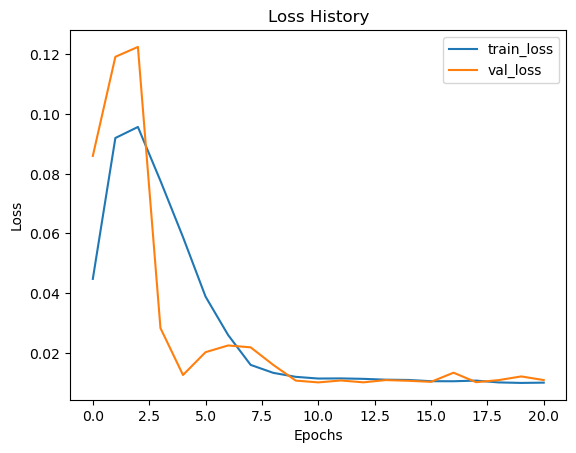

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

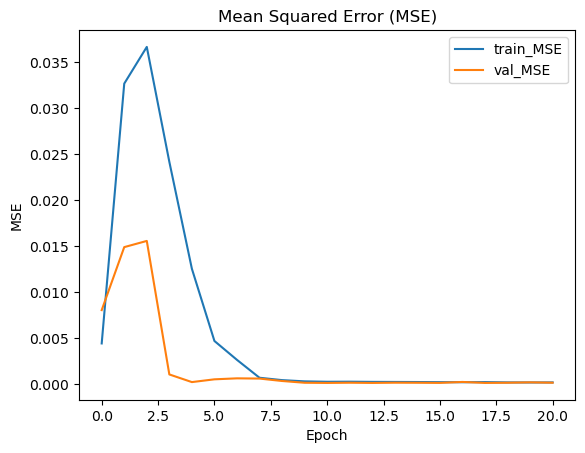

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

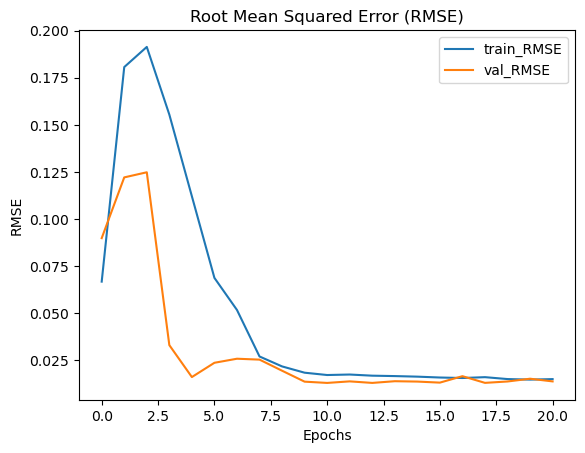

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

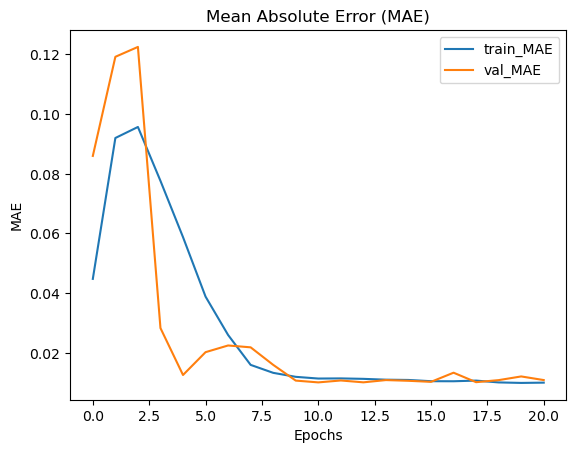

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

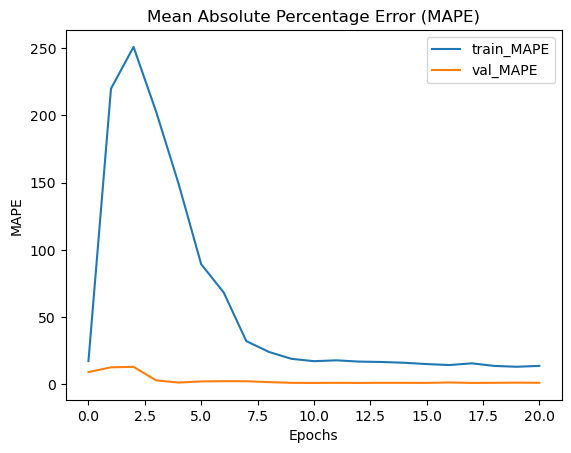

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 01:09:29.492898: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


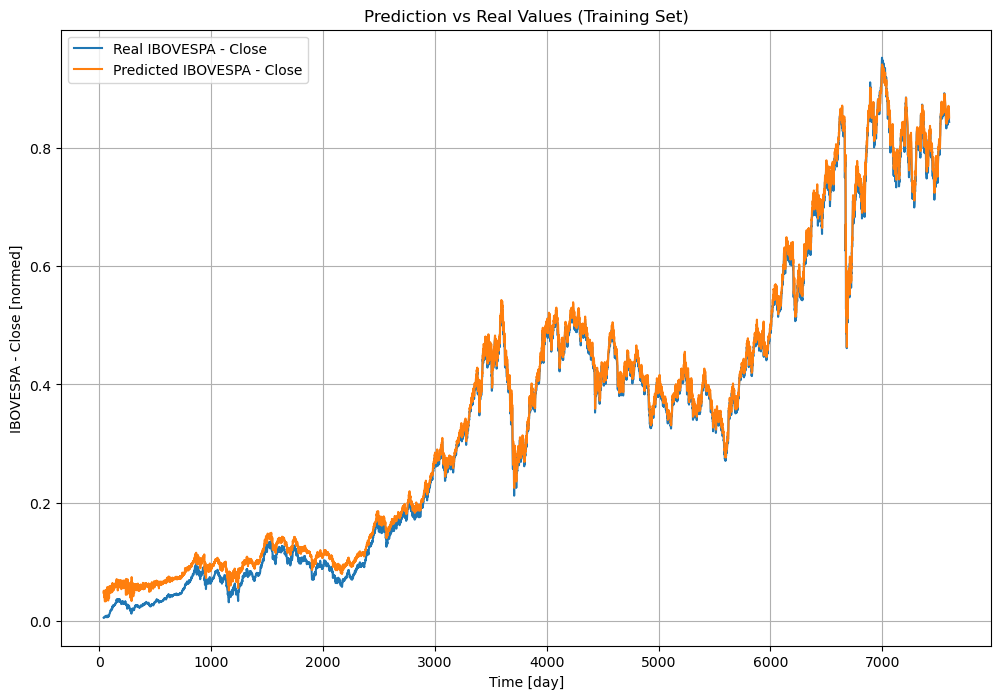

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


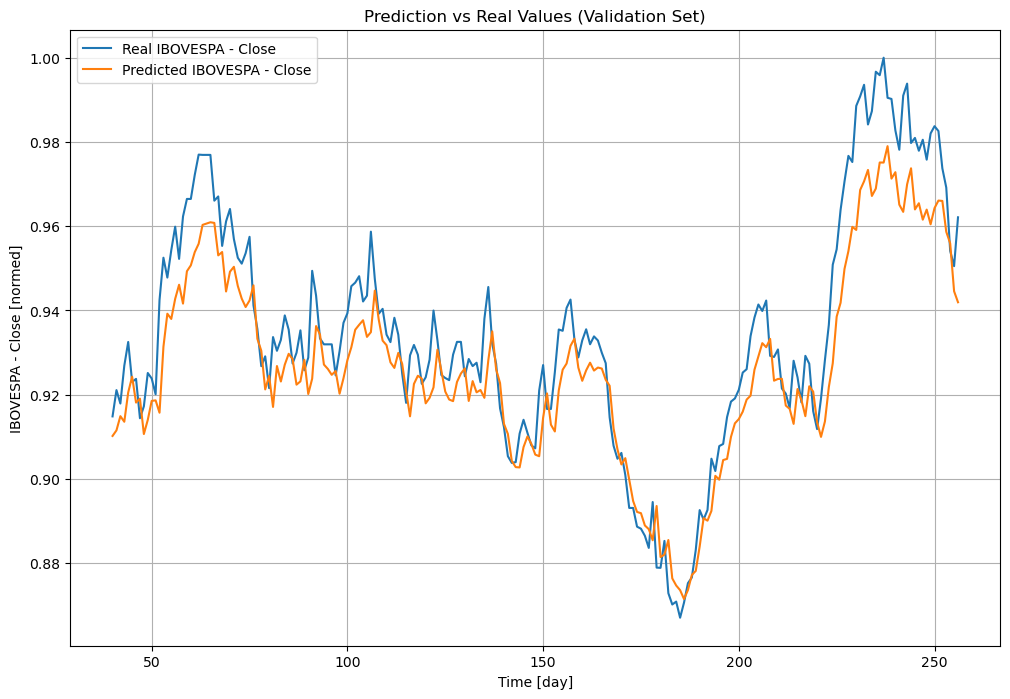

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


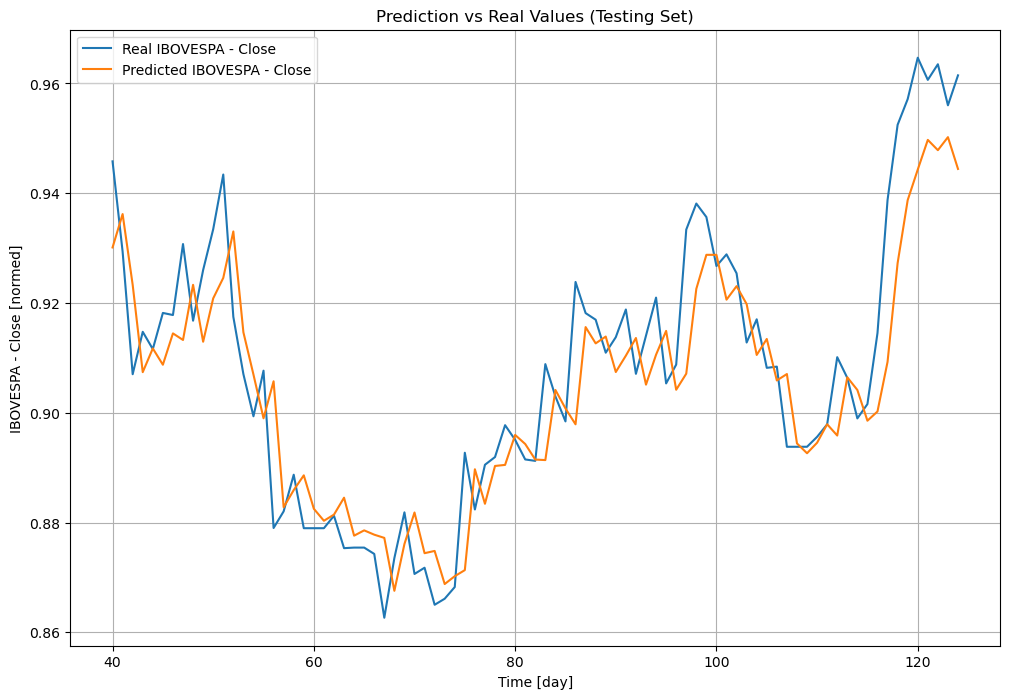

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

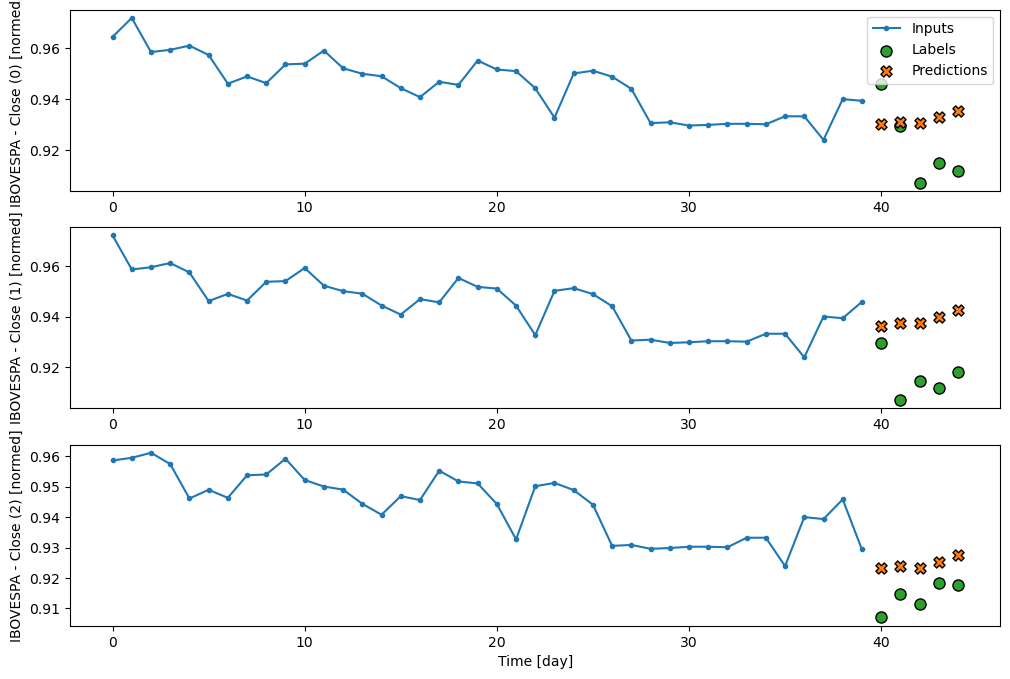

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:0s:743ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[[0.9301199 , 0.9301199 , 0.9301199 , ..., 0.9301199 ,
         0.9301199 , 0.9301199 ],
        [0.9310416 , 0.9310416 , 0.9310416 , ..., 0.9310416 ,
         0.9310416 , 0.9310416 ],
        [0.9306724 , 0.9306724 , 0.9306724 , ..., 0.9306724 ,
         0.9306724 , 0.9306724 ],
        [0.9329685 , 0.9329685 , 0.9329685 , ..., 0.9329685 ,
         0.9329685 , 0.9329685 ],
        [0.93550456, 0.93550456, 0.93550456, ..., 0.93550456,
         0.93550456, 0.93550456]],

       [[0.9362073 , 0.9362073 , 0.9362073 , ..., 0.9362073 ,
         0.9362073 , 0.9362073 ],
        [0.93749106, 0.93749106, 0.93749106, ..., 0.93749106,
         0.93749106, 0.93749106],
        [0.9373292 , 0.9373292 , 0.9373292 , ..., 0.9373292 ,
         0.9373292 , 0.9373292 ],
        [0.9398091 , 0.9398091 , 0.9398091 , ..., 0.9398091 ,
         0.9398091 , 0.9398091 ],
        [0.9423928 , 0.9423928 , 0.9423928 , ..., 0.9423928 ,
         0.9423928 , 0.9423928 ]],

       [[0.92330706, 0.92330706, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')